# Surfactant Stability Evaluation Analysis

## Experimental design:


The approach to analyzing the stability of the emulsion is by using lung samples collected from humans because their heterogeneity puts alot of stress on the micells and it is highly indicative of what will happen in vivo.

The **goal** is to stress the emulsion to a breaking point, and then analyze the degree of droplet coalescence in comparison to a control. 

The surfactants made with the new raw material will be tested against two control surfactants:
  -positive control: NK-R38 (target stability)
  -negative control: NK-R84 (lower limit of instability, will not accept anything worse)

The test surfactants are NK-102 and NK-104.


## Metrics commonly used to evaluate surfactant stability are:

  -**Doublets:** measures how many drops coalesced from a singlet (1 drop) into a doublet (2 drops)
  
  -**Total droplets:** when this number drops, its also a sign that droplets coalesced, resulting in a fewer number of droplets.
  
  -**Fill factor final/fill factor initial Ratio:** when this number moves away from 1, its means there are fewer droplets observed at the end of the trial than were observed in the beginning of the trial, leading us to believe that they have coalesced.


In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore the verson warning
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
# Load the data
raw_data = pd.read_csv('../Source_Data/sample_data.csv', encoding='utf-8')
raw_data.head()

,circuit_uuid,exp_id,run_uuid,chip_id,chip_ver,chip_idx,cir_idx,cir_ver,cir_vers,overall_idx,...,fill_factor_initial,included,neg,neg_0,neg_1,pos_0,pos_0_inc,pos_1,pos_1_inc,total_droplets
0,1a98c2ab-487a-42a8-b290-74a798e905be,EXP-VGXT8LA5,10ab869d-6439-44be-9013-025905656caf,VF6J7L4S,v4,0,0,NaN,NaN,0,...,1.0,21551,21061,21061,21551,506,490,0,0,23135
1,79ac9af0-279b-4424-a6ca-80121c653d43,EXP-VGXT8LA5,10ab869d-6439-44be-9013-025905656caf,VF6J7L4S,v4,0,1,NaN,NaN,1,...,1.0,20894,20416,20416,20894,485,478,0,0,22031
2,6920caef-ddfb-4202-96fd-282541fa73b7,EXP-VGXT8LA5,10ab869d-6439-44be-9013-025905656caf,VF6J7L4S,v4,0,2,NaN,NaN,2,...,1.0,22497,22046,22046,22497,459,451,0,0,24168
3,cb9f207f-099a-48f8-9053-d681e4f73cf5,EXP-VGXT8LA5,10ab869d-6439-44be-9013-025905656caf,VF6J7L4S,v4,0,3,NaN,NaN,3,...,1.0,20462,19957,19957,20462,508,505,0,0,21581
4,c6409fd6-b632-452e-8c25-aff70e5f120c,EXP-VGXT8LA5,10ab869d-6439-44be-9013-025905656caf,VF6J7L4S,v4,0,4,NaN,NaN,4,...,1.0,21401,20914,20914,21401,515,487,0,0,23102


In [4]:
# Fiter the raw data, keep columns: reaction, specimen， fill_factor_final, fill_factor_initial, doublets, total_droplets
columns_to_keep = ['reaction', 'specimen', 'fill_factor_final',
                   'fill_factor_initial', 'doublets', 'total_droplets']
filtered_data = raw_data[columns_to_keep]
filtered_data.head()

,reaction,specimen,fill_factor_final,fill_factor_initial,doublets,total_droplets
0,NK-R38,LR-S007-0528,1.0,1.0,57,23135
1,NK-R38,LR-S007-0528,1.0,1.0,48,22031
2,NK-R38,LR-S007-0528,1.0,1.0,34,24168
3,NK-R38,LR-S007-0528,1.0,1.0,42,21581
4,NK-R38,LR-S007-0528,1.0,1.0,51,23102


## Static Analysis
For a perfect surfactant:

- doublets should be zero in all samples 
- FFF/FFI should equal 1 in all samples 
- Each circuit should have 25,000 total droplets in all samples 

In [5]:
# group the data
grouped_data = filtered_data.groupby('reaction')

# calculate the aggregation
grouped_data_agg =(filtered_data.groupby('reaction')
                   .agg({
                    'specimen': 'count',
                    'fill_factor_final': 'mean',
                    'fill_factor_initial': 'mean',
                    'doublets': 'mean',
                    'total_droplets': 'mean'})
                    .reset_index()
    )

# Rename the columns
grouped_data_agg.rename(columns={
    'specimen': 'specimen_count',
    'fill_factor_final': 'mean_fill_factor_final',
    'fill_factor_initial': 'mean_fill_factor_initial',
    'doublets': 'mean_doublets',
    'total_droplets': 'mean_total_droplets'
}, inplace=True)

# Add new columns: fff/ffi
grouped_data_agg["fff/ffi_ratio"] = grouped_data_agg["mean_fill_factor_final"] / \
    grouped_data_agg["mean_fill_factor_initial"]

# Add new columns: fff/ffi_score
grouped_data_agg["fill_factor_score"] = abs(1 - grouped_data_agg["fff/ffi_ratio"])

grouped_data_agg

,reaction,specimen_count,mean_fill_factor_final,mean_fill_factor_initial,mean_doublets,mean_total_droplets,fff/ffi_ratio,fill_factor_score
0,NK-R102,200,0.992200,0.994550,103.470000,22582.865000,0.997637,0.002363
1,NK-R104,199,0.992714,0.993769,89.874372,22301.135678,0.998938,0.001062
2,NK-R38,198,0.993182,0.994394,102.242424,23404.883838,0.998781,0.001219
3,NK-R84,199,0.986231,0.992965,194.417085,21921.753769,0.993219,0.006781


In [6]:
# 颜色映射字典
palette = {
    'NK-R38': 'blue',
    'NK-R84': 'orange',
    'NK-R102': 'green',
    'NK-R104': 'red'
}

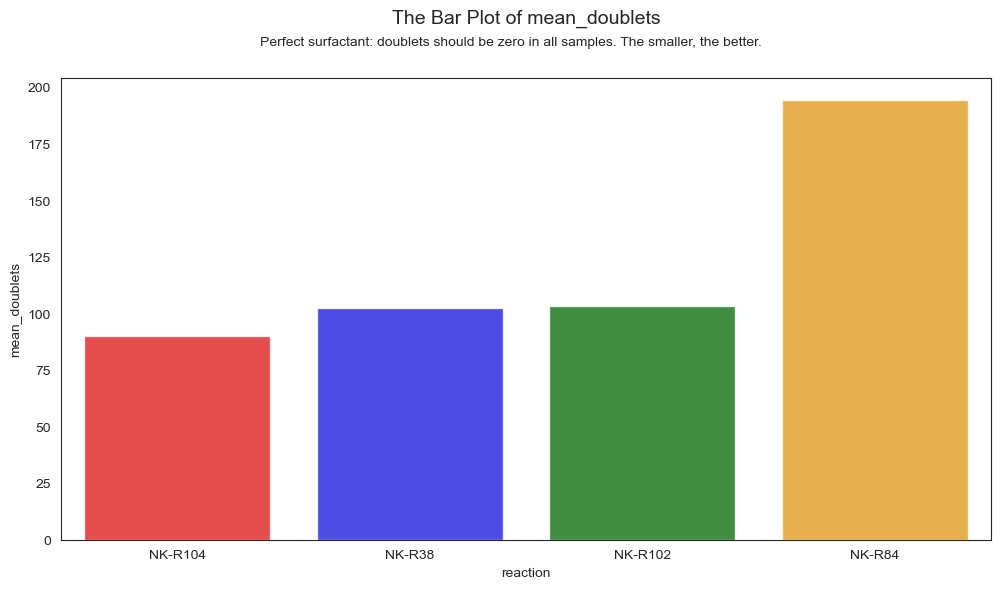

In [8]:
# Sorted the data Frame by mean_doublets
order_mean_doublets = (grouped_data_agg.sort_values(by='mean_doublets', ascending=True)['reaction']
                      .tolist())
# bar plot
sns.set_style("white")
plt.figure(figsize=(12, 6))
sns.barplot(x='reaction',  y='mean_doublets',
            data=grouped_data_agg, order=order_mean_doublets,
            palette=palette, alpha=0.8)
# Title and Suptitle
plt.title("The Bar Plot of mean_doublets", fontsize=14, y=1.1)
plt.suptitle("Perfect surfactant: doublets should be zero in all samples. The smaller, the better.", fontsize=10, y=0.95)
plt.savefig('../Output_Figures/The Bar Plot of mean_doublets.png')
plt.show()

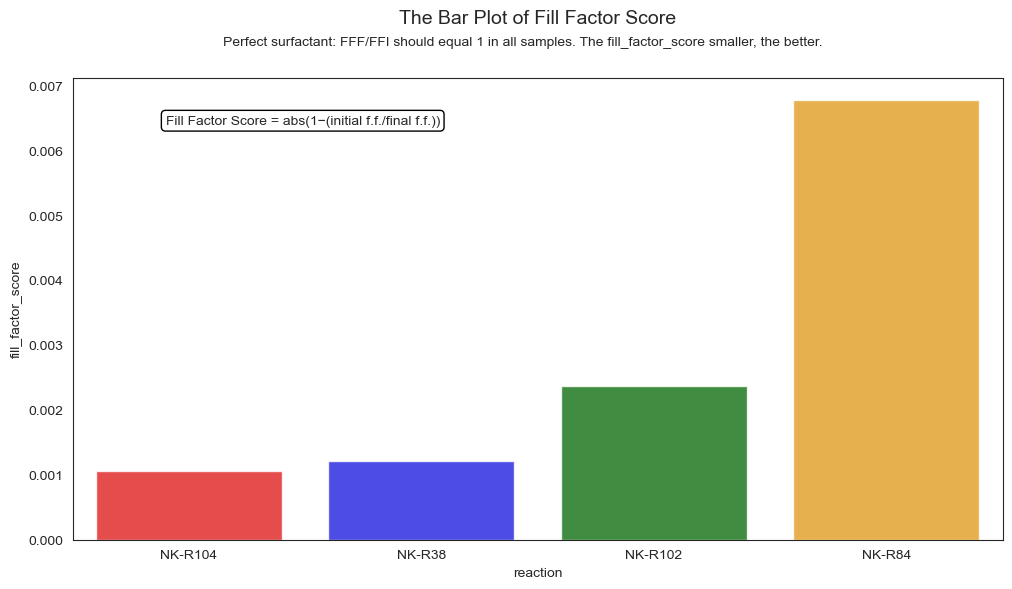

In [9]:
# Sorted the data Frame by fill_factor_score
order_fill_factor_score = (grouped_data_agg.sort_values(by='fill_factor_score', ascending=True)['reaction']
         .tolist())
# bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='reaction',  y='fill_factor_score',
            data=grouped_data_agg, order=order_fill_factor_score ,
            palette=palette, alpha=0.8)
#Title and Suptitle
plt.title("The Bar Plot of Fill Factor Score", fontsize=14, y=1.1)
plt.suptitle("Perfect surfactant: FFF/FFI should equal 1 in all samples. The fill_factor_score smaller, the better.", fontsize=10, y=0.95)

plt.annotate("Fill Factor Score = abs(1−(initial f.f./final f.f.))",
             xy=(0.1, 0.9), xycoords='axes fraction', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
plt.savefig('../Output_Figures/The Bar Plot of Fill Factor Score.png')
plt.show()

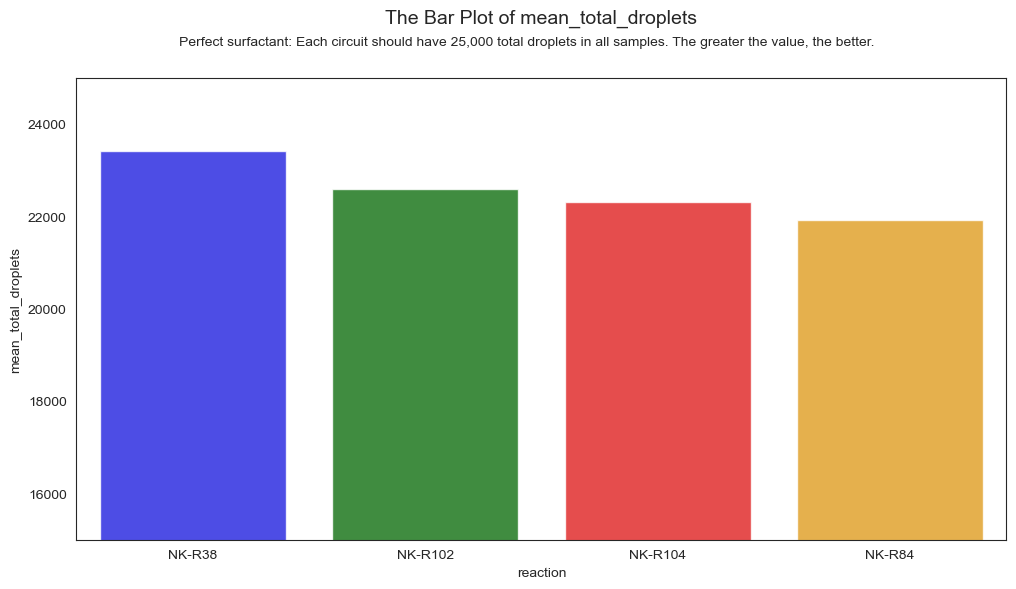

In [10]:
# Sorted the data Frame by mean_total_droplets
order_mean_total_droplets = (grouped_data_agg.sort_values(by='mean_total_droplets', ascending=False)['reaction']
         .tolist())

# bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='reaction',  y='mean_total_droplets',  data=grouped_data_agg,
            order=order_mean_total_droplets, palette=palette, alpha=0.8)
plt.ylim(15000, 25000)

# Title and Suptitle
plt.title("The Bar Plot of mean_total_droplets", fontsize=14, y=1.1)
plt.suptitle("Perfect surfactant: Each circuit should have 25,000 total droplets in all samples. The greater the value, the better.", fontsize=10, y=0.95)
plt.savefig('../Output_Figures/The Bar Plot of mean_total_droplets(Starts with 15000).png')
plt.show()

## Analysis of Experimental Results for Each Specimen Group

In [17]:
# Prepare doublets data frame to plot
# Step 1: Data Preparation
reactions = ['NK-R38', 'NK-R84', 'NK-R102', 'NK-R104']
grouped_dfs = []

# Group the dataframes by reaction and specimen, and calculate mean doublets
for reaction in reactions:
    reaction_df = filtered_data[filtered_data['reaction'] == reaction]
    grouped_df = reaction_df.groupby('specimen').mean(numeric_only=True)['doublets'].reset_index()
    grouped_df['Surfactant'] = reaction  # Add a column for the reaction
    grouped_dfs.append(grouped_df)

# Concatenate all grouped dataframes into one long-form dataframe
long_df = pd.concat(grouped_dfs, ignore_index=True)
long_df

,specimen,doublets,Surfactant
0,LR-S002-1321,33.400000,NK-R38
1,LR-S003-0259,59.200000,NK-R38
2,LR-S003-0261,100.900000,NK-R38
3,LR-S007-0523,43.666667,NK-R38
4,LR-S007-0524,41.000000,NK-R38
...,...,...,...
75,LR-S010-0077,110.200000,NK-R104
76,LR-S018-0439,127.300000,NK-R104
77,LR-S019-0176,111.900000,NK-R104
78,LR-S019-0177,31.444444,NK-R104


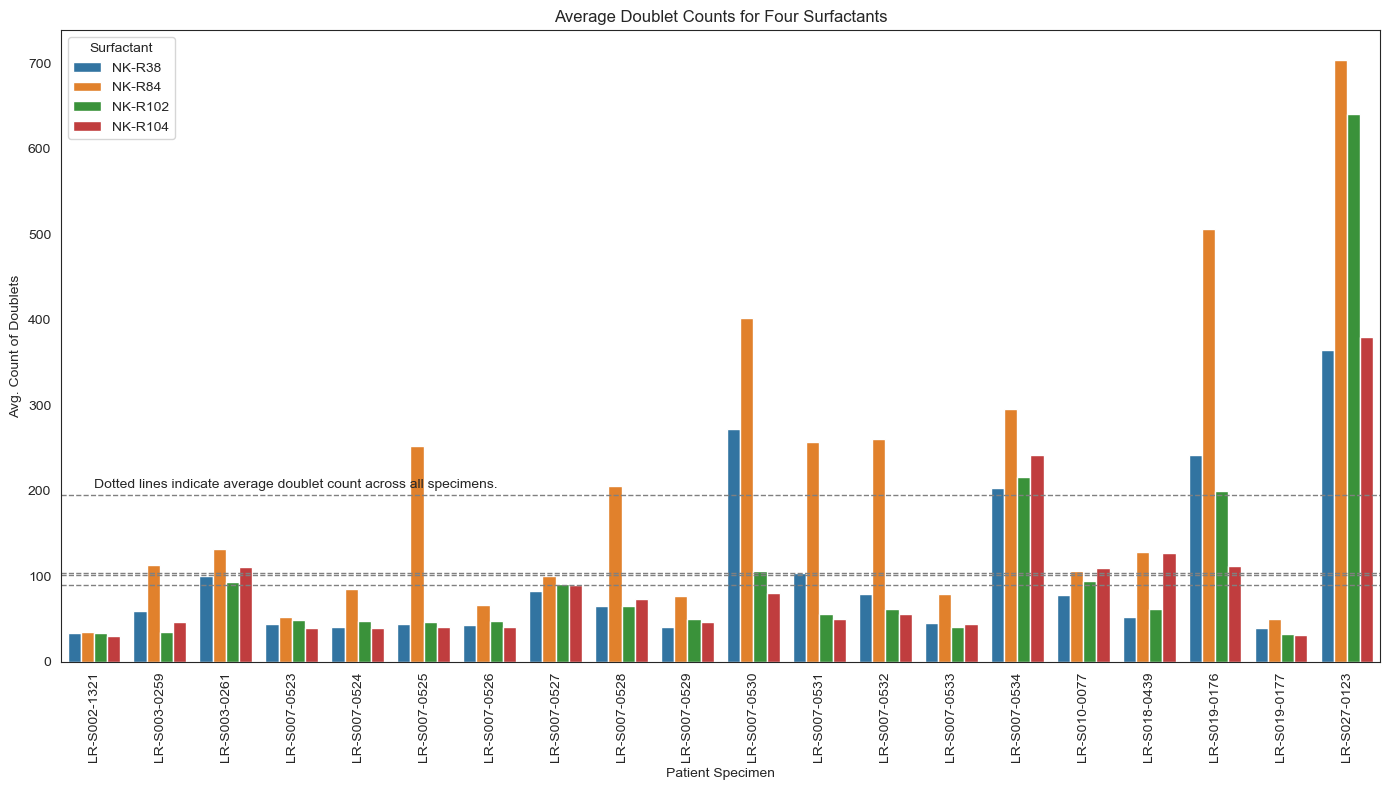

In [24]:
# Plotting with Seaborn
plt.figure(figsize=(14, 8))

# Create the bar plot
sns.barplot(data=long_df, x='specimen', y='doublets', hue='Surfactant')

# Adding title and labels
plt.title('Average Doublet Counts for Four Surfactants')
plt.xlabel('Patient Specimen')
plt.ylabel('Avg. Count of Doublets')

# Calculate and plot the average lines
for reaction in reactions:
    avg_doublet = long_df[long_df['Surfactant'] == reaction]['doublets'].mean()
    plt.axhline(y=avg_doublet, linestyle='--', color='grey', linewidth=1)

# Adding text for the dotted lines
plt.text(0, max(long_df['doublets']) - 500, 'Dotted lines indicate average doublet count across all specimens.', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the legend (only for bar plot)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:len(reactions)], labels[0:len(reactions)], title='Surfactant', loc='upper left')

# Show the plot
plt.tight_layout()
plt.savefig('../Output_Figures/The Bar Plot of Average Doublets.png')
plt.show()

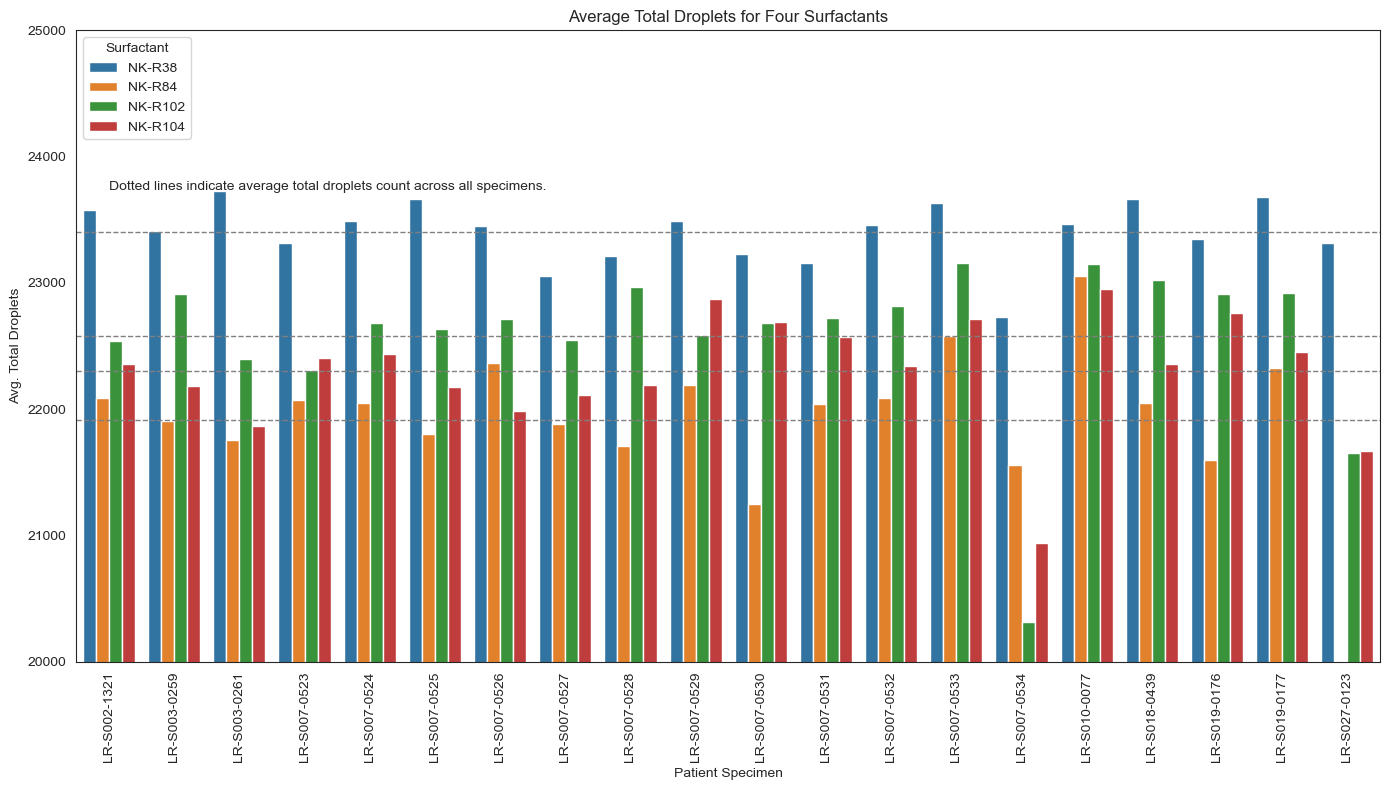

In [29]:
# Bar chart for total droplets
# Step 1: Data Preparation
reactions = ['NK-R38', 'NK-R84', 'NK-R102', 'NK-R104']
grouped_dfs = []

# Group the dataframes by reaction and specimen, and calculate mean total droplets
for reaction in reactions:
    reaction_df = filtered_data[filtered_data['reaction'] == reaction]
    grouped_df = reaction_df.groupby('specimen').mean(numeric_only=True)['total_droplets'].reset_index()
    grouped_df['Surfactant'] = reaction  # Add a column for the reaction
    grouped_dfs.append(grouped_df)

# Concatenate all grouped dataframes into one long-form dataframe
long_df = pd.concat(grouped_dfs, ignore_index=True)

# Step 2: Plotting with Seaborn
plt.figure(figsize=(14, 8))

# Create the bar plot
sns.barplot(data=long_df, x='specimen', y='total_droplets', hue='Surfactant')

# Adding title and labels
plt.title('Average Total Droplets for Four Surfactants')
plt.xlabel('Patient Specimen')
plt.ylabel('Avg. Total Droplets')

# Calculate and plot the average lines
for reaction in reactions:
    avg_total_droplets = long_df[long_df['Surfactant'] == reaction]['total_droplets'].mean()
    plt.axhline(y=avg_total_droplets, linestyle='--', color='grey', linewidth=1)

# Adding text for the dotted lines
plt.text(0, max(long_df['total_droplets']) + 10, 'Dotted lines indicate average total droplets count across all specimens.', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# figure y-axis starts with 15000
plt.ylim(20000, 25000)

# Show the legend (only for bar plot)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:len(reactions)], labels[0:len(reactions)], title='Surfactant', loc='upper left')

# Show the plot
plt.tight_layout()
plt.savefig('../Output_Figures/The Bar Plot of Total Droplets.png')
plt.show()

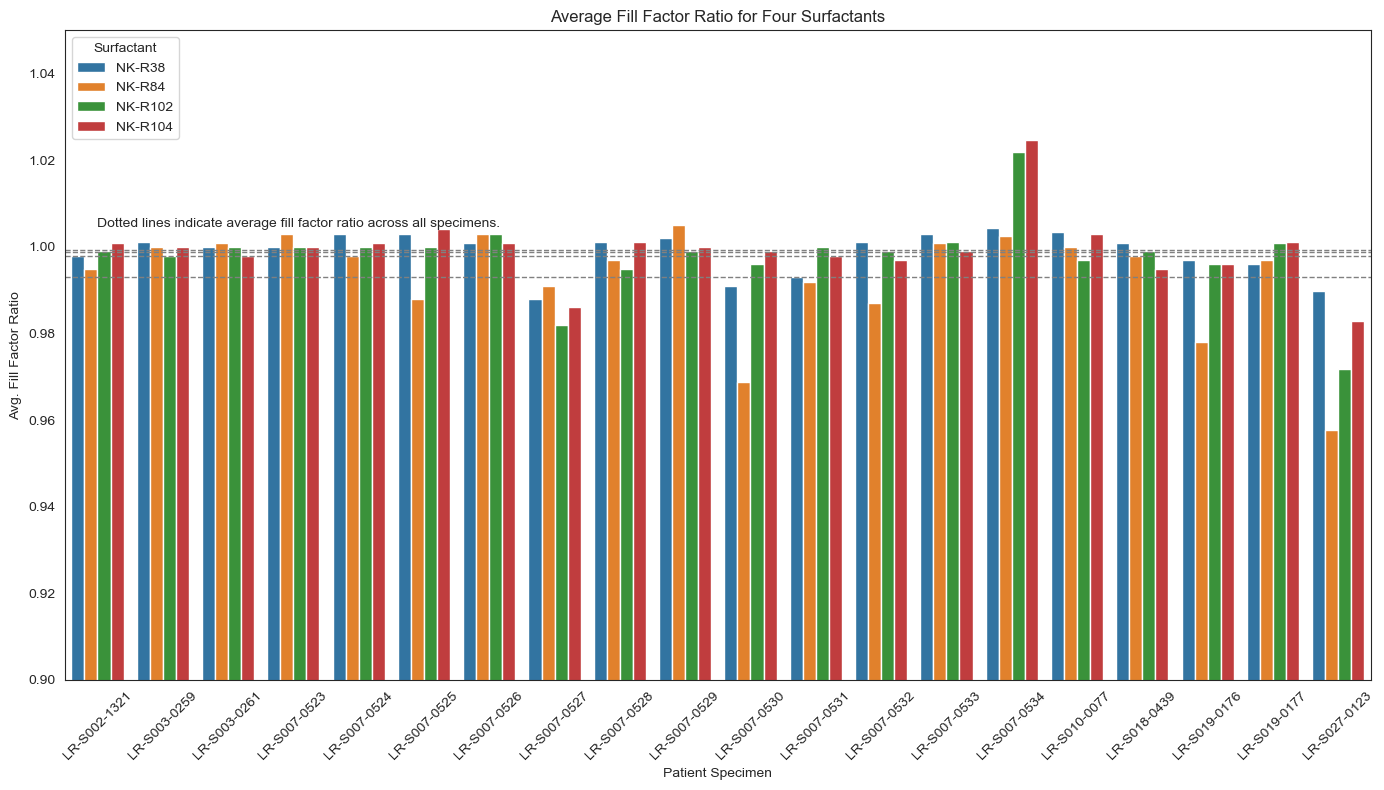

In [44]:
# Bar plot for full fill ratio
# Step 1: Data Preparation
filtered_data['fill_factor_ratio'] = filtered_data['fill_factor_final'] / filtered_data['fill_factor_initial']

reactions = ['NK-R38', 'NK-R84', 'NK-R102', 'NK-R104']
grouped_dfs = []

# Group the dataframes by reaction and specimen, and calculate mean fill factor ratio
for reaction in reactions:
    reaction_df = filtered_data[filtered_data['reaction'] == reaction]
    grouped_df = reaction_df.groupby('specimen').mean(numeric_only=True)['fill_factor_ratio'].reset_index()
    grouped_df['Surfactant'] = reaction  # Add a column for the reaction
    grouped_dfs.append(grouped_df)

# Concatenate all grouped dataframes into one long-form dataframe
long_df = pd.concat(grouped_dfs, ignore_index=True)

# Step 2: Plotting with Seaborn
plt.figure(figsize=(14, 8))

# Create the bar plot
sns.barplot(data=long_df, x='specimen', y='fill_factor_ratio', hue='Surfactant')

# Adding title and labels
plt.title('Average Fill Factor Ratio for Four Surfactants')
plt.xlabel('Patient Specimen')
plt.ylabel('Avg. Fill Factor Ratio')

# Calculate and plot the average lines
for reaction in reactions:
    avg_ff_ratio = long_df[long_df['Surfactant'] == reaction]['fill_factor_ratio'].mean()
    plt.axhline(y=avg_ff_ratio, linestyle='--', color='grey', linewidth=1)

# Adding text for the dotted lines
plt.text(0, max(long_df['fill_factor_ratio']) - 0.02, 'Dotted lines indicate average fill factor ratio across all specimens.', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Configure the y axis
plt.ylim(0.9, 1.05)

# Show the legend (only for bar plot)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:len(reactions)], labels[0:len(reactions)], title='Surfactant', loc='upper left')

# Show the plot
plt.tight_layout()
plt.savefig('../Output_Figures/Average Fill Factor Ratio for Four Surfactants.png')
plt.show()

## Surfactant Stability Evaluation 

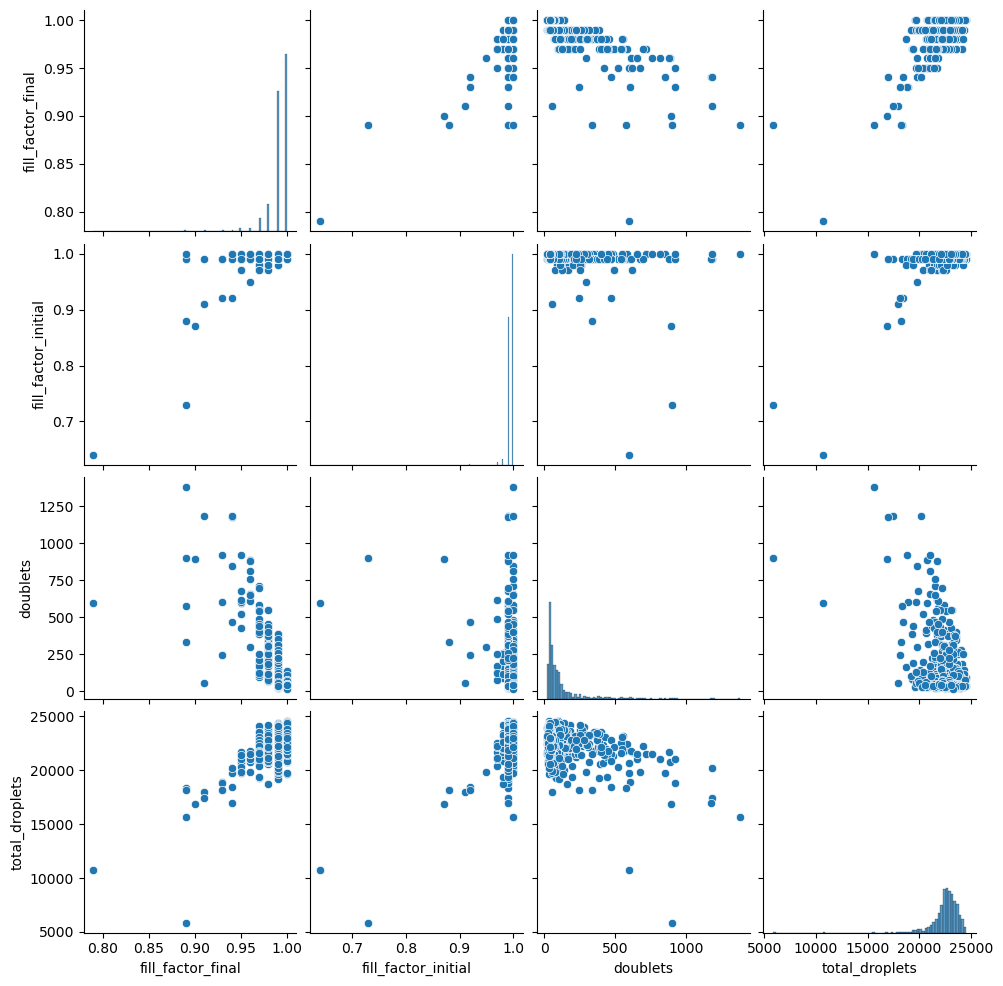

In [7]:
# The default diagonal uses histogram, non-diagonal uses scatter.
sns.pairplot(filtered_data)

##  Doublets by Specimen(easures how many drops coalesced)

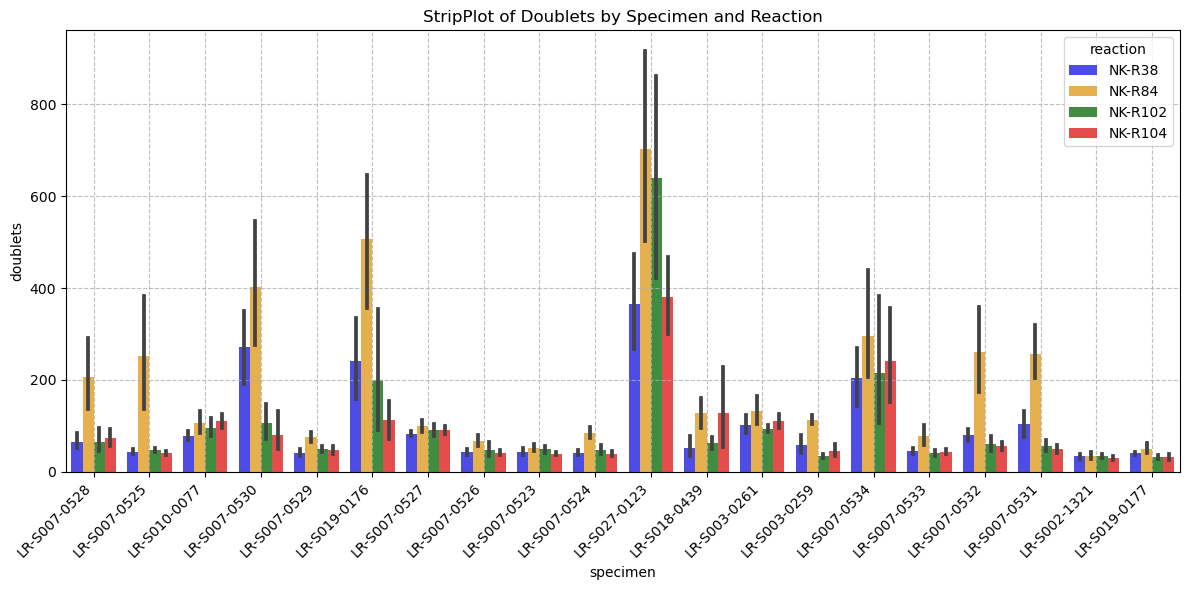

In [111]:
# Box plot
plt.figure(figsize=(12, 6))
sns.barplot(x="specimen", y="doublets", hue="reaction",
            data=filtered_data, palette=palette, alpha=0.8)

# Setting figure attributes
plt.title('StripPlot of Doublets by Specimen and Reaction')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis label
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()  # Adjust chart layout
plt.show()

### Chart Explanation

1. X-axis (specimen): Represents different specimen samples.
2. Y-axis (doublets): Indicates the number of doublets.
3. Legend (reaction): Each color corresponds to a reaction condition, including `NK-R38`, `NK-R84`, `NK-R102`, and `NK-R104`.
4. **Error bars (black lines)**: The black line on each bar represents the variance or standard error of that data group (usually standard error), reflecting the dispersion of the data. Longer error bars indicate greater variability in that data group; shorter error bars indicate less variability in that data group.

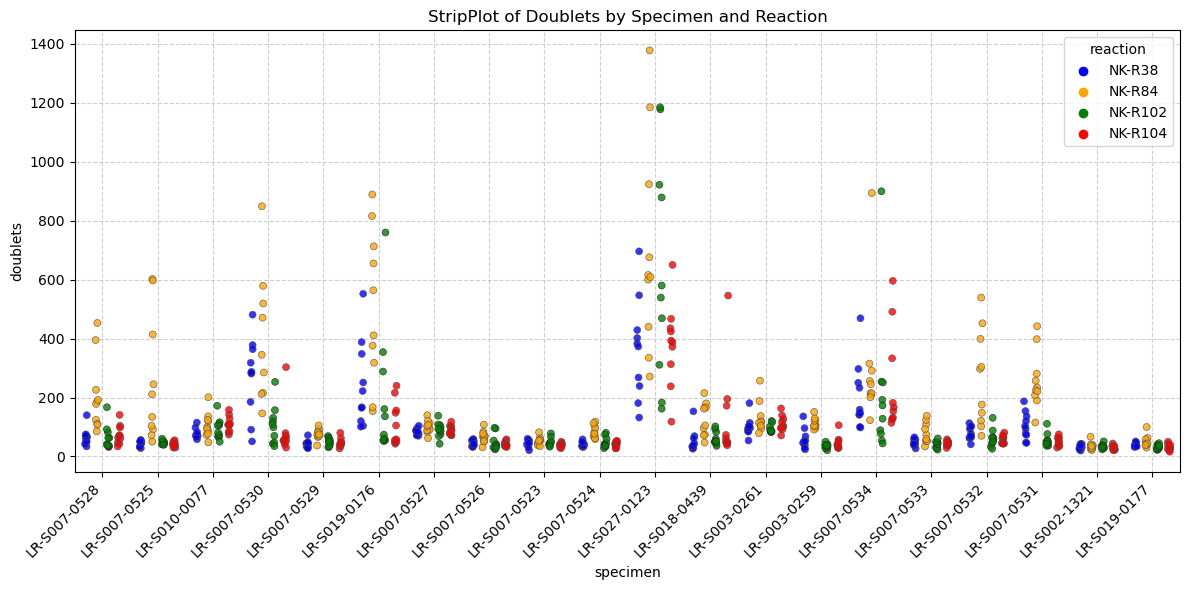

In [112]:
# Strpplot
plt.figure(figsize=(12, 6))

sns.stripplot(x="specimen", y="doublets", hue="reaction", data=filtered_data, 
              dodge=True, jitter=True, linewidth=0.5,
              palette=palette, alpha=0.8)

# Setting figure attributes
plt.title('StripPlot of Doublets by Specimen and Reaction')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis label
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()  # Adjust the layout
plt.show()

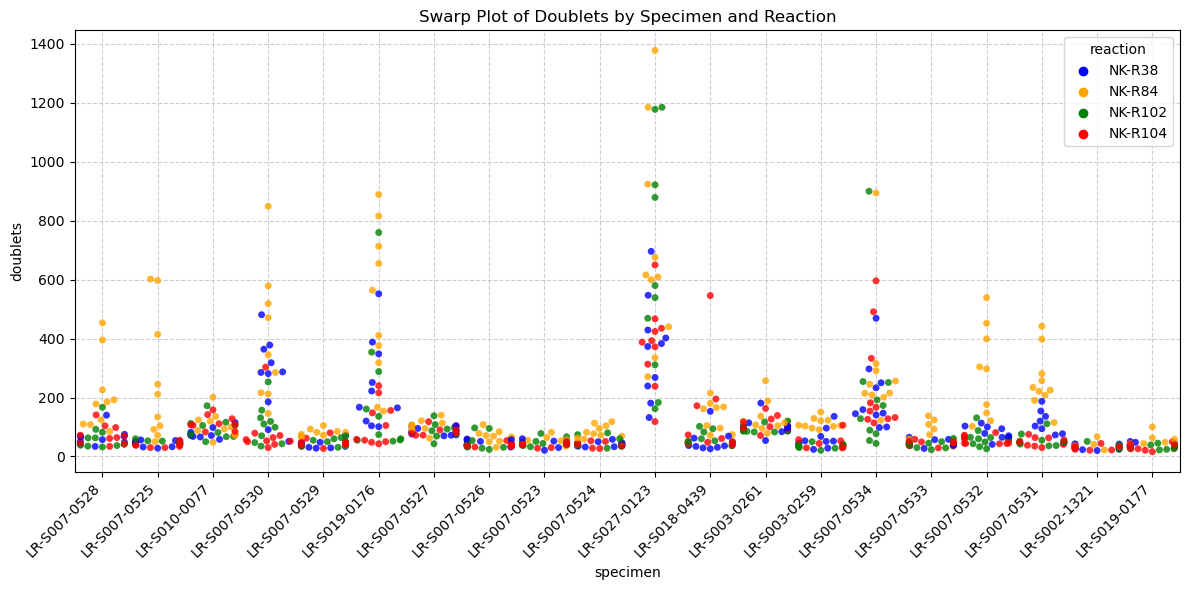

In [113]:
# Swarmplot
# Bee swarm plots can avoid point overlap, making the view more intuitive.
plt.figure(figsize=(12, 6))
sns.swarmplot(x="specimen", y="doublets", hue="reaction",
              data=filtered_data, palette=palette, alpha=0.8)

# Setting figure attributes
plt.title('Swarp Plot of Doublets by Specimen and Reaction')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()  # Adjust the layout
plt.show()

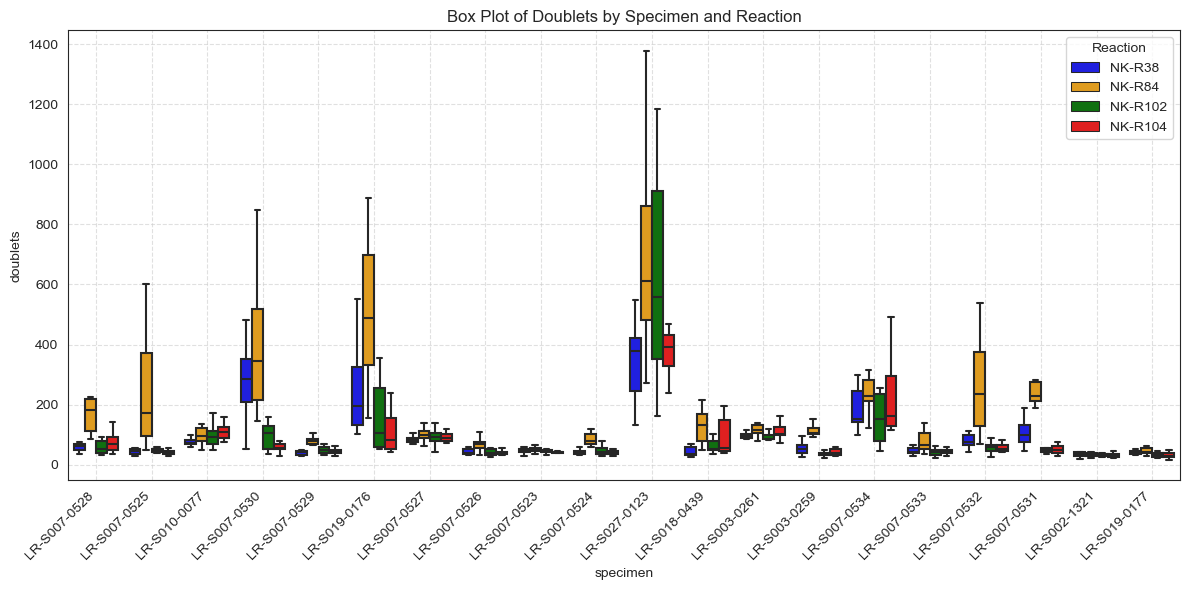

In [11]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='specimen', y='doublets', hue='reaction',
            data=filtered_data, palette=palette, showfliers=False)

# Setting figure attributes
plt.title('Box Plot of Doublets by Specimen and Reaction')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis
plt.legend(title='Reaction', loc='upper right')
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()  # adjust the layout
plt.savefig('../Output_Figures/The Box Plot of Doublets by Specimen and Reaction.png')
plt.show()

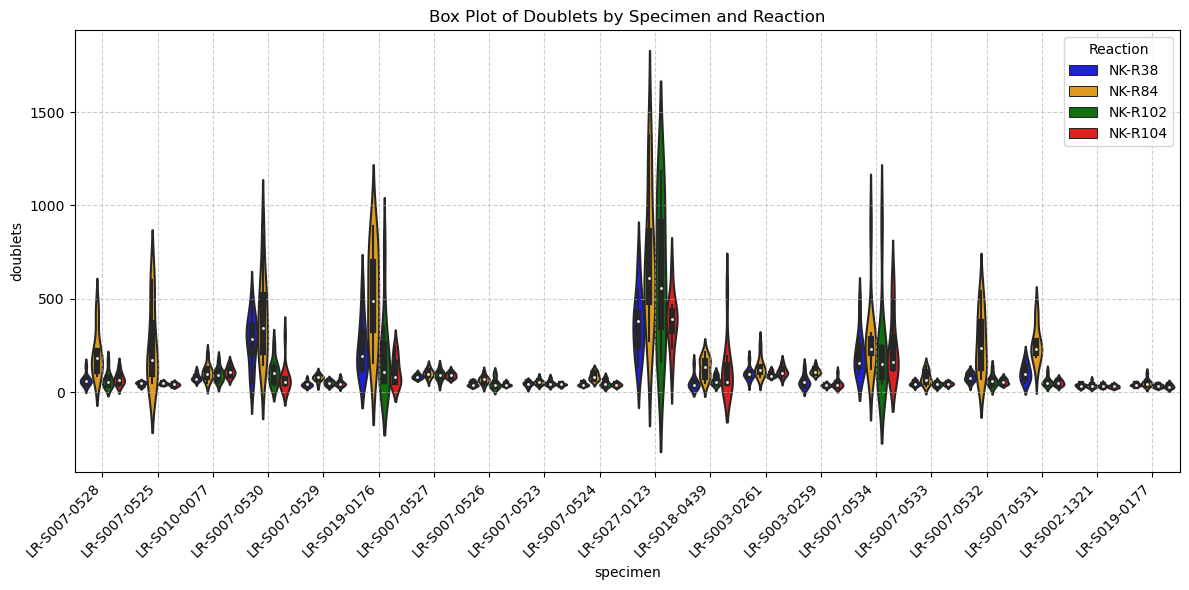

In [118]:
# violinplot
# The violin plot combines the advantages of a box plot and a kernel density estimate 
# plot, used to display the shape, central tendency, and variability of data 
# distribution.
plt.figure(figsize=(12, 6))
# scale could take three variables:
# count determines the width of each violin, 
# area makes each violin have the same area, 
# width makes each violin have the same width
sns.violinplot(x='specimen', y='doublets', hue='reaction', scale='count',
               data=filtered_data, palette=palette, alpha=0.8)

# Setting figure attributes
plt.title('Box Plot of Doublets by Specimen and Reaction')
plt.xticks(rotation=45, ha='right')  # Rotate the x axis
plt.legend(title='Reaction', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()  # adjust the plot layout
plt.show()

## Total droplets by Specimen (when this number drops, its also a sign that droplets coalesced)

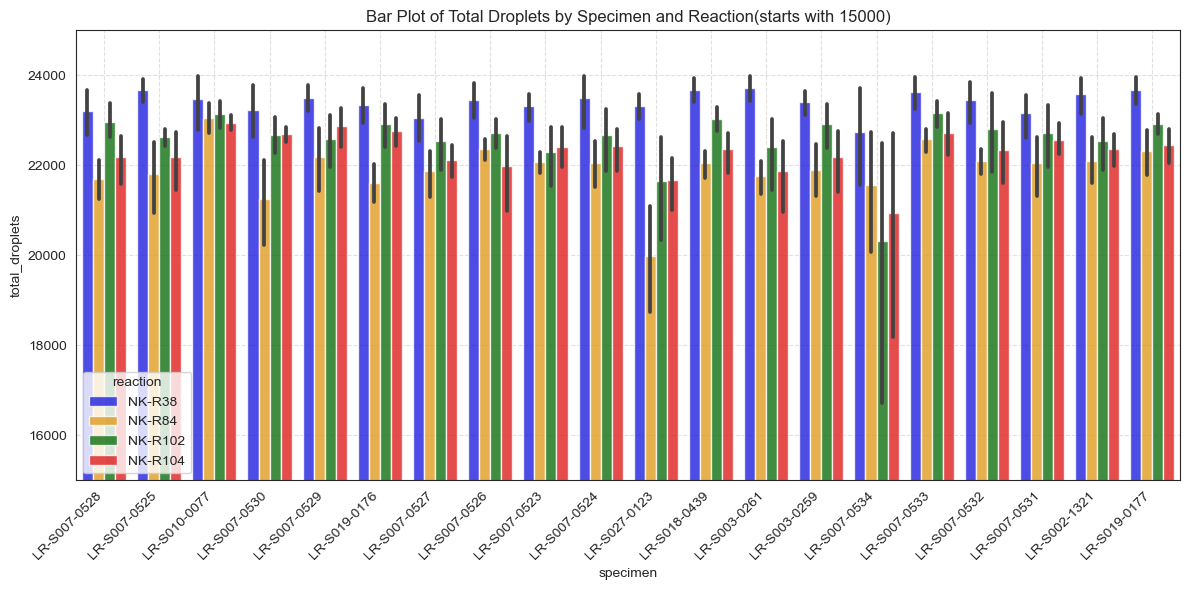

In [60]:
# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="specimen", y="total_droplets",
            hue="reaction", data=filtered_data, palette=palette, alpha=0.8)

# Setting figure attributes
plt.title('Bar Plot of Total Droplets by Specimen and Reaction(starts with 15000)')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis label
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(15000, 25000)
plt.tight_layout()  # Adjust chart layout
plt.savefig("../Output_Figures/Bar Plot of Total Droplets by Specimen and Reaction(starts with 15000).png")
plt.show()

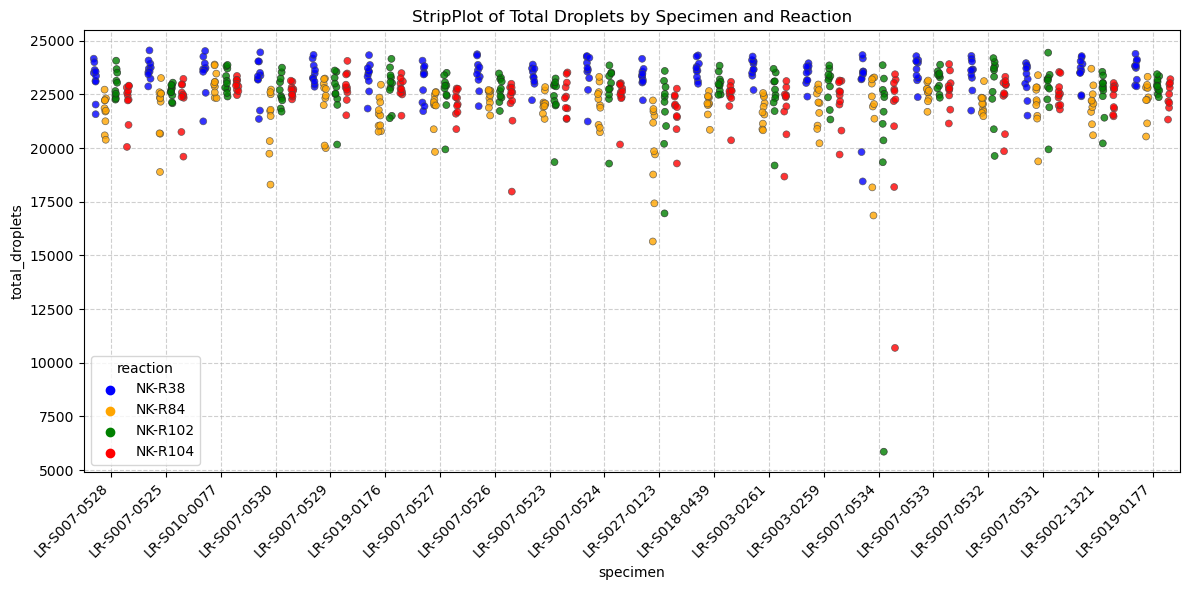

In [168]:
# Strpplot
plt.figure(figsize=(12, 6))
sns.stripplot(x="specimen", y="total_droplets", hue="reaction", data=filtered_data,
              dodge=True, jitter=True, linewidth=0.5, palette=palette, alpha=0.8)

# Setting figure attributes
plt.title('StripPlot of Total Droplets by Specimen and Reaction')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis label
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()  # Adjust the layout
plt.show()

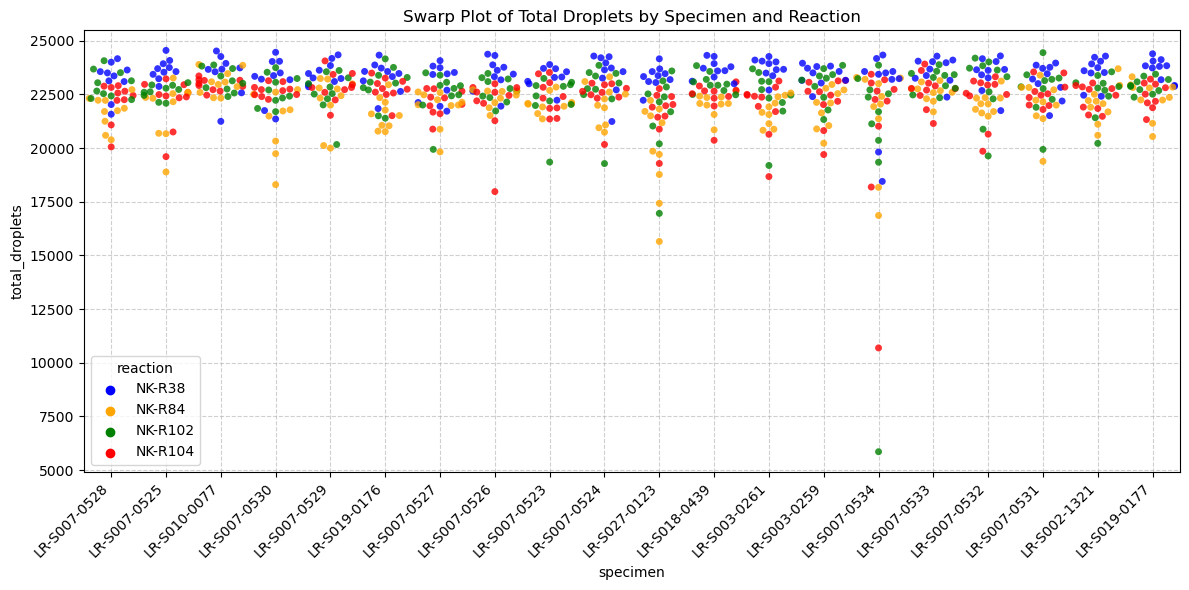

In [189]:
# Swarmplot
# Bee swarm plots can avoid point overlap, making the view more intuitive.
plt.figure(figsize=(12, 6))
sns.swarmplot(x="specimen", y="total_droplets",
              hue="reaction", data=filtered_data, palette=palette, alpha=0.8)

# Setting figure attributes
plt.title('Swarp Plot of Total Droplets by Specimen and Reaction')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()  # Adjust the layout
plt.show()

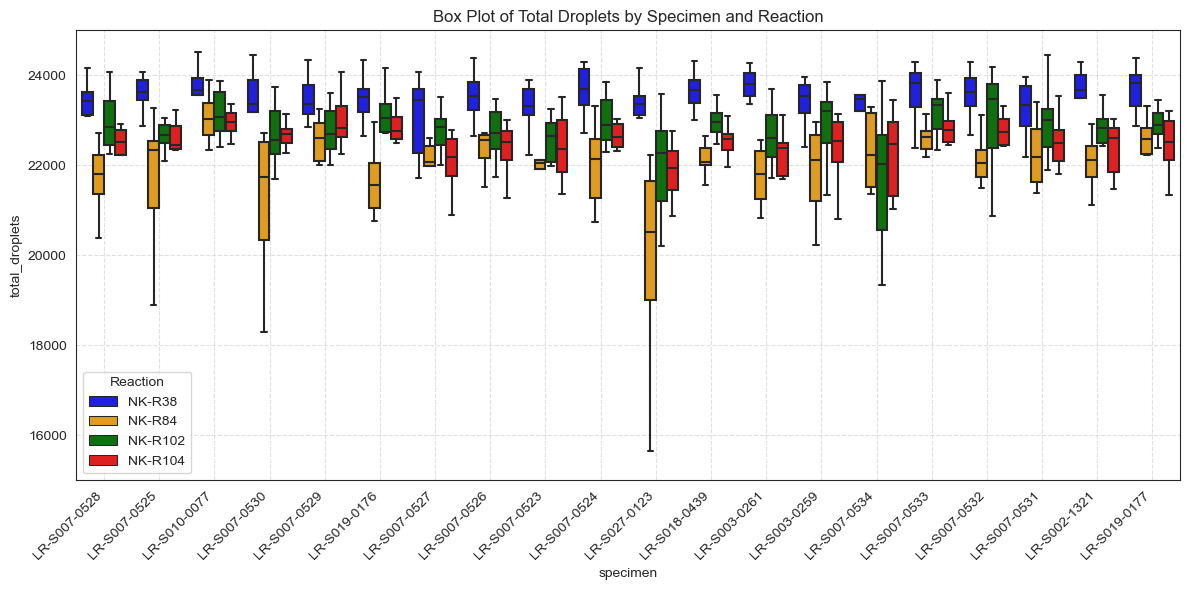

In [61]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='specimen', y='total_droplets', hue='reaction',
            data=filtered_data, palette=palette, showfliers=False)

# Setting figure attributes
# remove the outlier!!!
# y axis start with 125000!!!
plt.title('Box Plot of Total Droplets by Specimen and Reaction')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis
plt.legend(title='Reaction', loc='best')
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(15000, 25000)
plt.tight_layout()  # adjust the layout
plt.savefig('../Output_Figures/The Box Plot of Total Droplets by Specimen and Reaction(start with 15000).png')
plt.show()

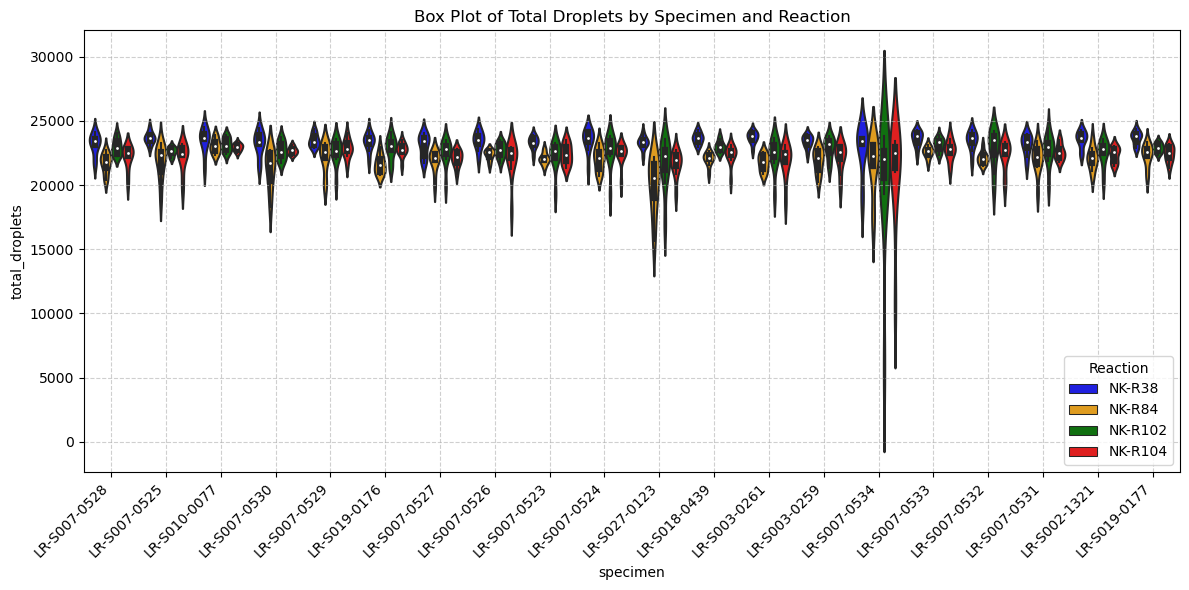

In [191]:
# violinplot
# The violin plot combines the advantages of a box plot and a kernel density estimate
# plot, used to display the shape, central tendency, and variability of data
# distribution.
plt.figure(figsize=(12, 6))
# scale could take three variables:
# count determines the width of each violin,
# area makes each violin have the same area,
# width makes each violin have the same width
sns.violinplot(x='specimen', y='total_droplets', hue='reaction', scale='count',
               data=filtered_data, palette=palette, alpha=0.8)

# Setting figure attributes
plt.title('Box Plot of Total Droplets by Specimen and Reaction')
plt.xticks(rotation=45, ha='right')  # Rotate the x axis
plt.legend(title='Reaction', loc='best')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()  # adjust the plot layout
plt.show()

## Fill factor intial/fillfactor final (when this number moves away from 1, its means droplets coalesced) 

In [63]:
y_axis = filtered_data['fill_factor_final'] / \
    filtered_data['fill_factor_initial']

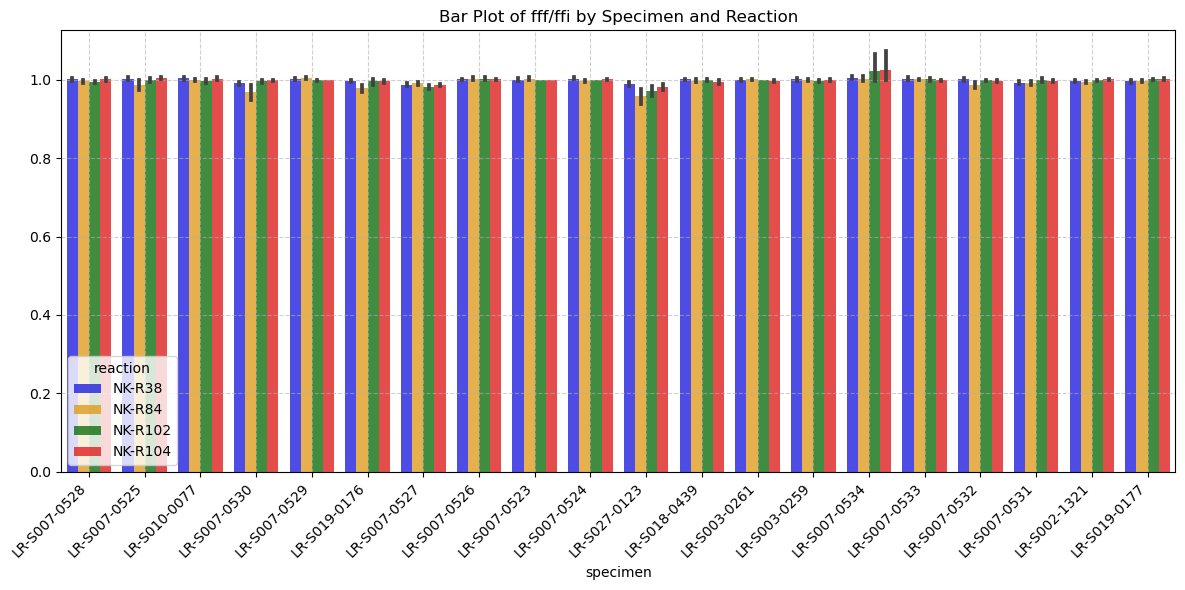

In [128]:
# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="specimen", y=y_axis,
            hue="reaction", data=filtered_data, palette=palette, alpha=0.8)

# Setting figure attributes
plt.title('Bar Plot of fff/ffi by Specimen and Reaction')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis label
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()  # Adjust chart layout
plt.show()

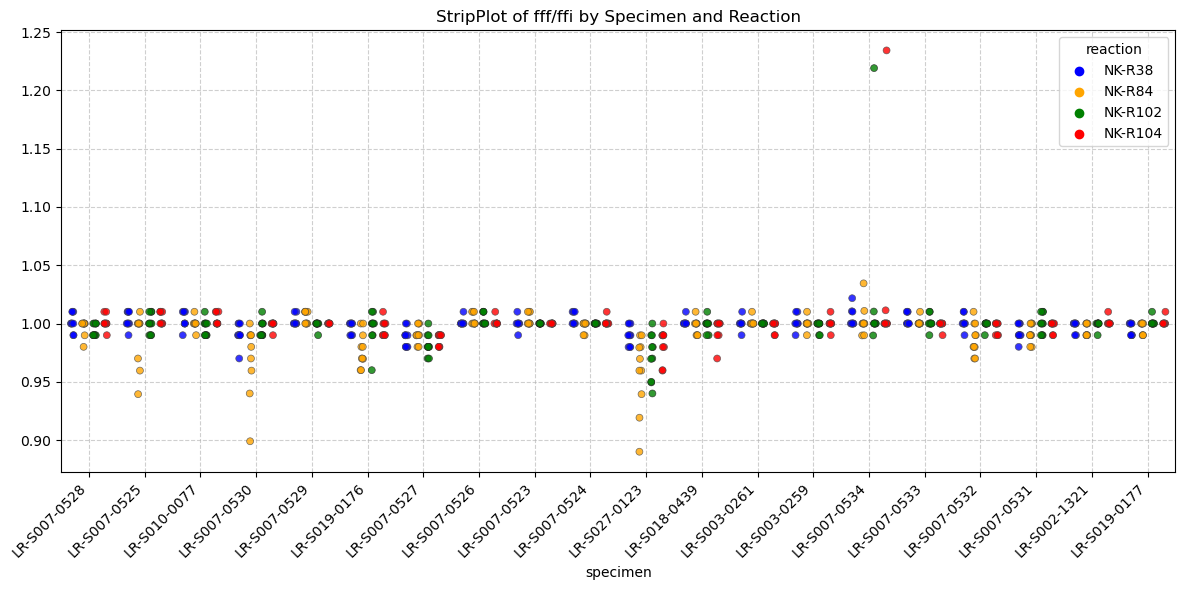

In [129]:
# Strpplot
plt.figure(figsize=(12, 6))
sns.stripplot(x="specimen", y=y_axis,hue="reaction", data=filtered_data,
              dodge=True, jitter=True, linewidth=0.5, palette=palette, alpha=0.8)

# Setting figure attributes
plt.title('StripPlot of fff/ffi by Specimen and Reaction')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis label
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()  # Adjust the layout
plt.show()

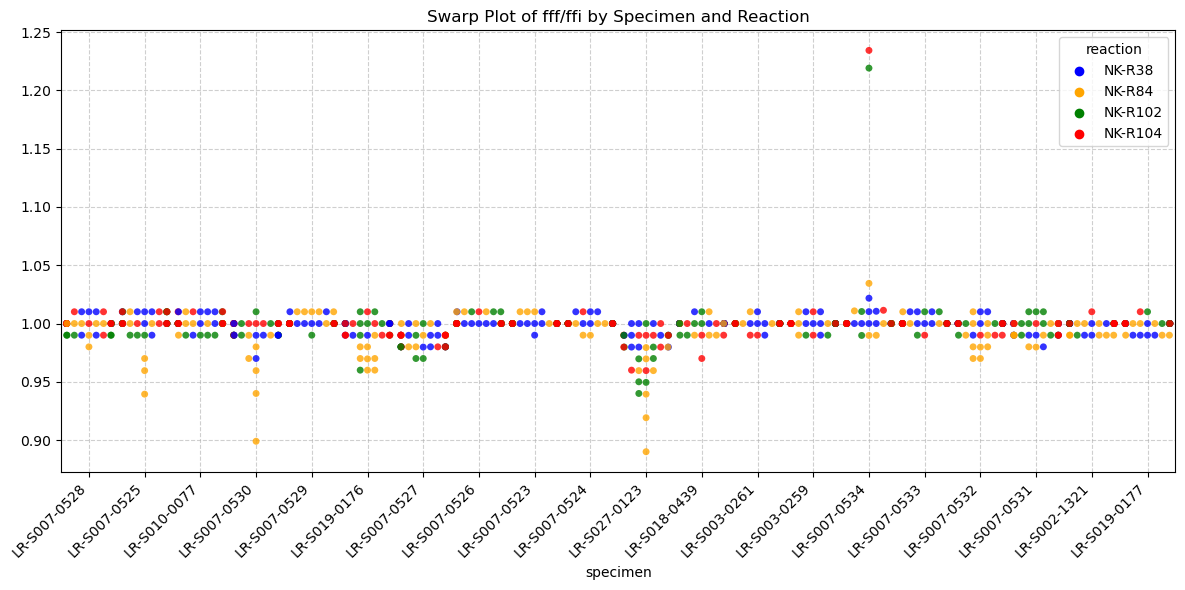

In [130]:
# Swarmplot
# Bee swarm plots can avoid point overlap, making the view more intuitive.
plt.figure(figsize=(12, 6))
sns.swarmplot(x="specimen", y=y_axis,
              hue="reaction", data=filtered_data, palette=palette, alpha=0.8)

# Setting figure attributes
plt.title('Swarp Plot of fff/ffi by Specimen and Reaction')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()  # Adjust the layout
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/steveyuan/Documents/github_files/Python_Analysis_Project/0. Surfactant 0.Stability Evaluation Analysis/Output_Figures/Box Plot of fff/ffi by Specimen and Reaction.png'

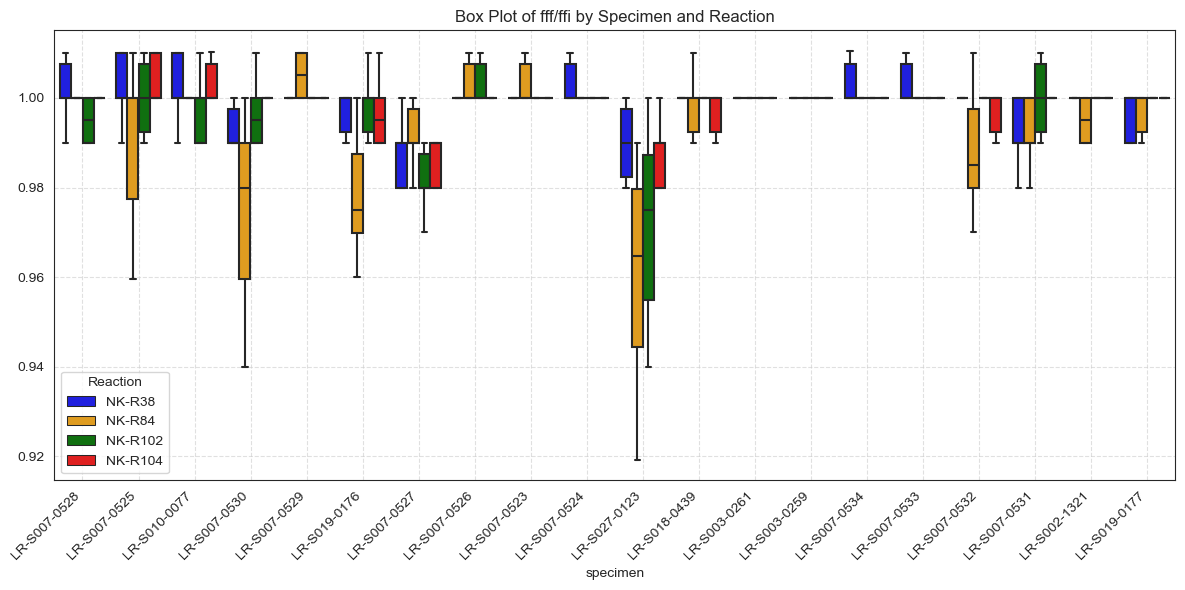

In [64]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='specimen', y=y_axis, hue='reaction',
            data=filtered_data, palette=palette, showfliers=False)

# Setting figure attributes
plt.title('Box Plot of fff/ffi by Specimen and Reaction')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis
plt.legend(title='Reaction', loc='best')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()  # adjust the layout
plt.savefig("../Output_Figures/Box Plot of fff/ffi by Specimen and Reaction.png")
plt.show()

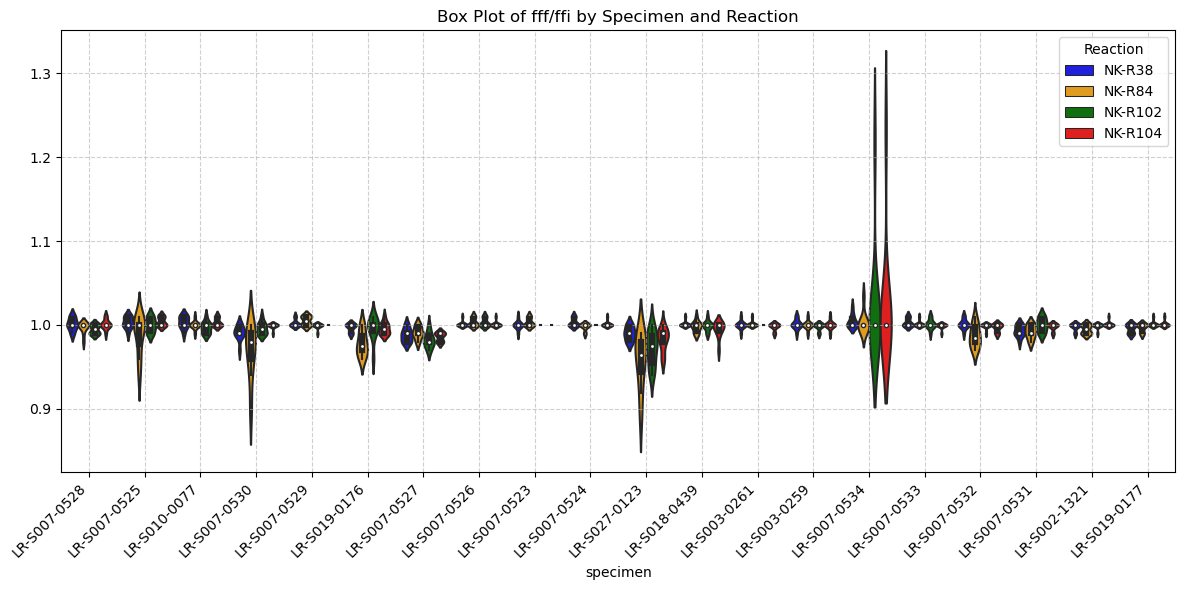

In [133]:
# violinplot
# The violin plot combines the advantages of a box plot and a kernel density estimate
# plot, used to display the shape, central tendency, and variability of data
# distribution.
plt.figure(figsize=(12, 6))
# scale could take three variables:
# count determines the width of each violin,
# area makes each violin have the same area,
# width makes each violin have the same width
sns.violinplot(x='specimen', y=y_axis, hue='reaction', scale='count',
               data=filtered_data, palette=palette, alpha=0.8)

# Setting figure attributes
plt.title('Box Plot of fff/ffi by Specimen and Reaction')
plt.xticks(rotation=45, ha='right')  # Rotate the x axis
plt.legend(title='Reaction', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()  # adjust the plot layout
plt.show()

## Observation & Analysis

- From the data we can see that NK-R84 is the furthest away from the goal in every criteria, meaning it has the weakest stability out of all surfactants tested.
- NK-R102 and NK-104 preform very close to NK-R38 (our best surfactant to date) .
- Since Both 102 and 104 perform better than NK-R84 and very close to NK-R38, it means that the raw material used in the experimental surfactants is perfectly acceptable to purchase.


## Data validation  

    To determine the effectiveness of different surfactants in maintaining micelle formation in the emulsion solution for diagnosing bacterial pneumonia.  

### Hypotheses  

- **Null Hypothesis (H0):** There is no significant difference in the effectiveness of different surfactants.  
   
- **Alternative Hypothesis (H1):** There is a significant difference in the effectiveness of different surfactants.  

### Experimental Design  

#### Surfactants  
    - Surfactant A (e.g., NK-R102)  
    - Surfactant B (e.g., NK-R104)  
    - Surfactant C(compare) (e.g., NK-R84)  

#### Metrics  
   - Total Droplets  
   - Doublets  
   - Fill Factor Score


In [47]:
# Prepare the data
filtered_data['fill_factor_Score'] = abs(1-filtered_data['fill_factor_ratio'])
filtered_data.columns

Index(['reaction', 'specimen', 'fill_factor_final', 'fill_factor_initial',
       'doublets', 'total_droplets', 'fill_factor_ratio', 'fill_factor_Score'],
      dtype='object')

### Hypothesis Testing

- **T-tests**:Conducted t-tests after log transformation to compare means 

- **Mann-Whitney U Tests**: Conducted Mann-Whitney U tests on original data to compare distributions 

### Effect Size Calculation

- **Cohen's d**: Calculated Cohen's d to assess the practical significance of differences

In [48]:
# Dependence
import scipy.stats as stats

# Function to calculate Cohen's d for effect size
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx - 1) * np.std(x, ddof=1) ** 2 + (ny - 1) * np.std(y, ddof=1) ** 2) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

# Function to perform the analysis for a given metric
def analyze_metric(data, metric, reaction1, reaction2):
    # Extract data for the specified reactions from the 'reaction' column
    group1 = data[data['reaction'] == reaction1][metric]
    group2 = data[data['reaction'] == reaction2][metric]

    # Convert data to numeric, handling non-numeric values
    group1 = pd.to_numeric(group1, errors='coerce').dropna()
    group2 = pd.to_numeric(group2, errors='coerce').dropna()

    # Summary statistics
    group1_summary = group1.describe()
    group2_summary = group2.describe()

    # Plot frequency distribution (histograms)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(group1, bins=30, kde=True)
    plt.title(f'{reaction1} {metric} Frequency Distribution')
    plt.subplot(1, 2, 2)
    sns.histplot(group2, bins=30, kde=True)
    plt.title(f'{reaction2} {metric} Frequency Distribution')
    plt.show()

    # Plot boxplots
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=group1)
    plt.title(f'{reaction1} {metric} Boxplot')
    plt.subplot(1, 2, 2)
    sns.boxplot(y=group2)
    plt.title(f'{reaction2} {metric} Boxplot')
    plt.show()

    # Log transformation to reduce skewness
    group1_log = np.log1p(group1)
    group2_log = np.log1p(group2)
    group1_log_skewness = group1_log.skew()
    group2_log_skewness = group2_log.skew()

    # Perform T-test and Mann-Whitney U test
    t_stat_log, p_value_log = stats.ttest_ind(group1_log, group2_log)
    u_stat, p_value = stats.mannwhitneyu(group1, group2)
    effect_size = cohen_d(group1, group2)

    return {
        'group1_summary': group1_summary,
        'group2_summary': group2_summary,
        'group1_log_skewness': group1_log_skewness,
        'group2_log_skewness': group2_log_skewness,
        't_stat_log': t_stat_log,
        'p_value_log': p_value_log,
        'u_stat': u_stat,
        'p_value': p_value,
        'effect_size': effect_size
    }

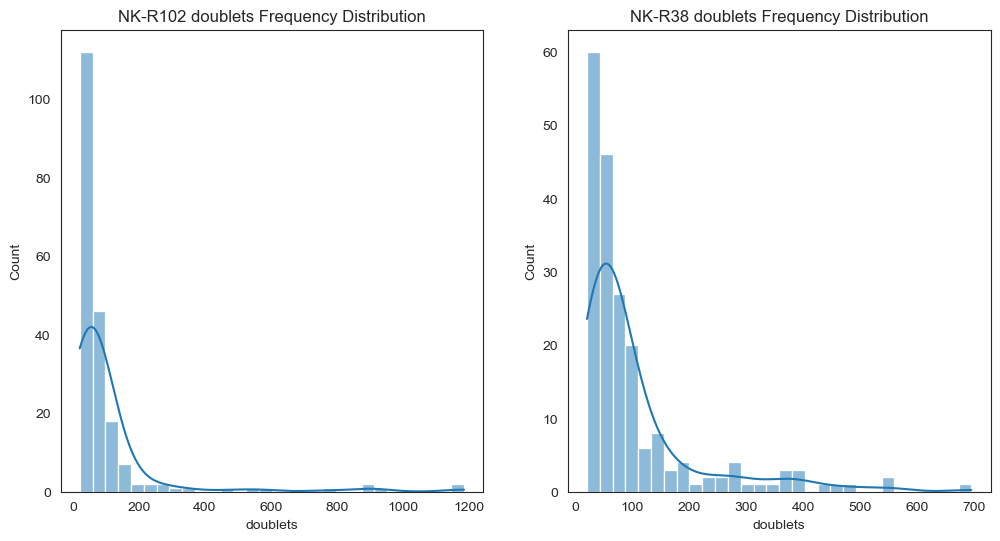

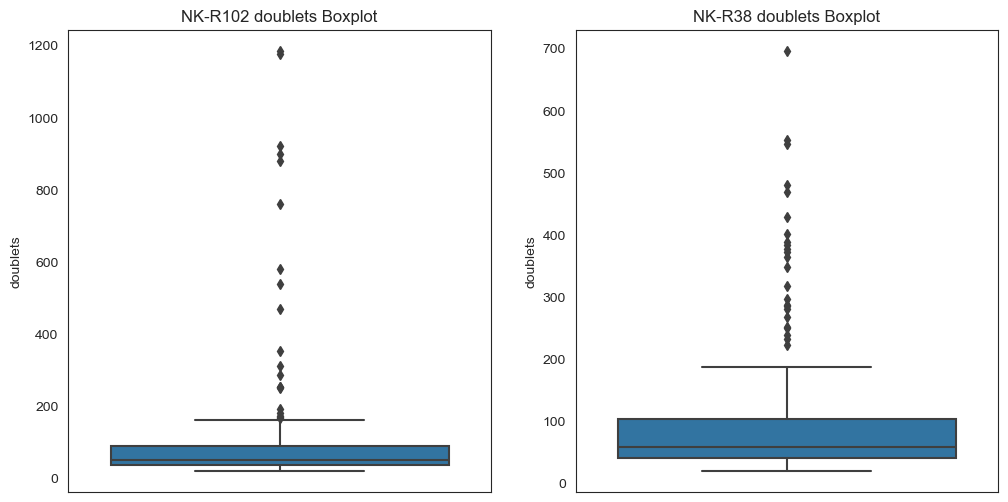

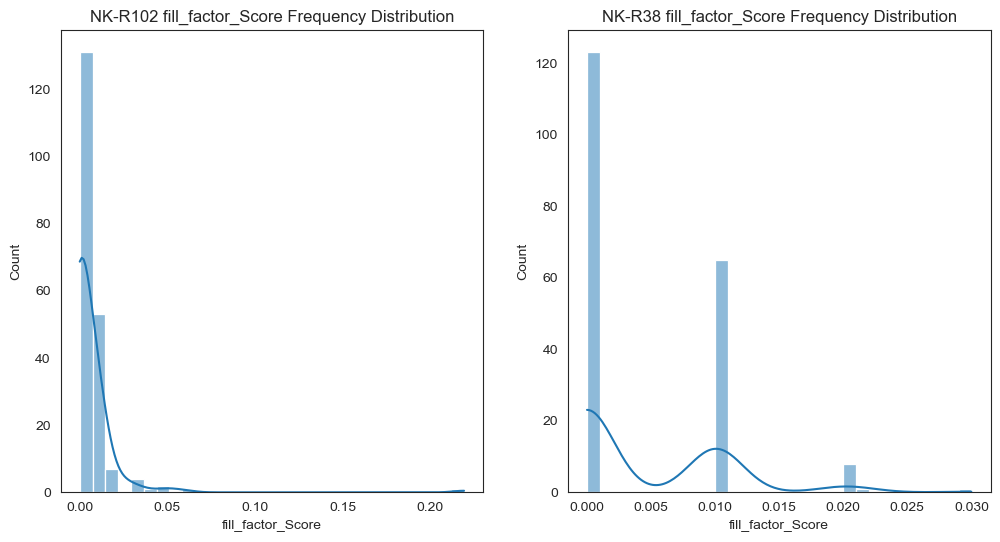

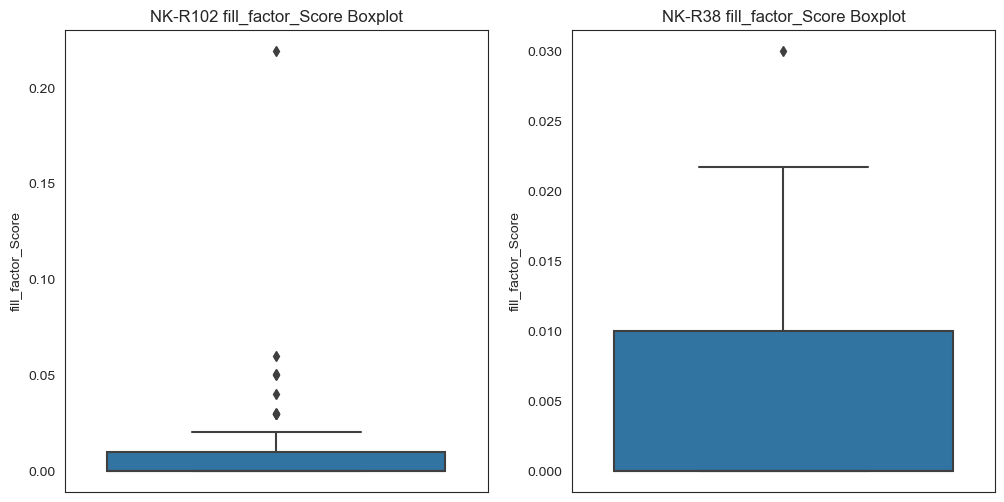

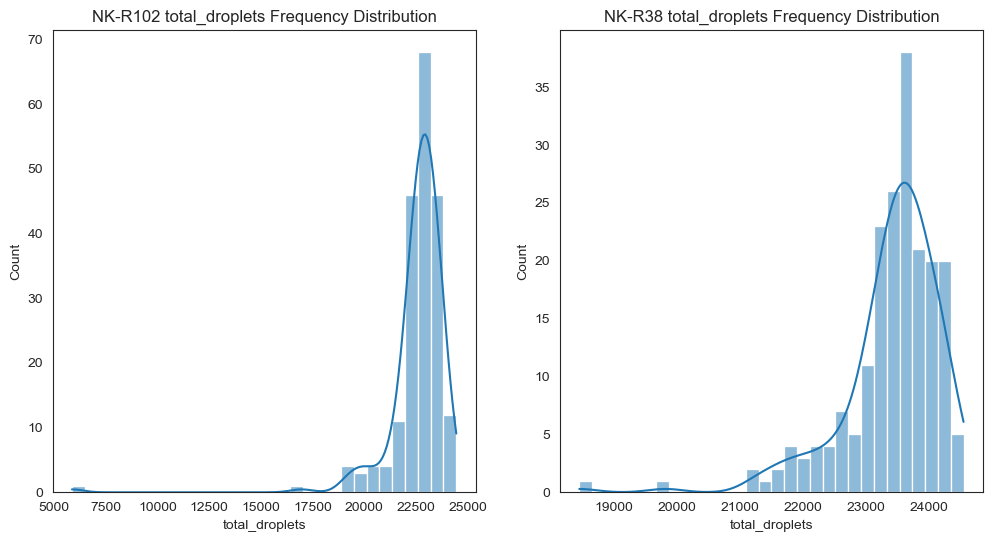

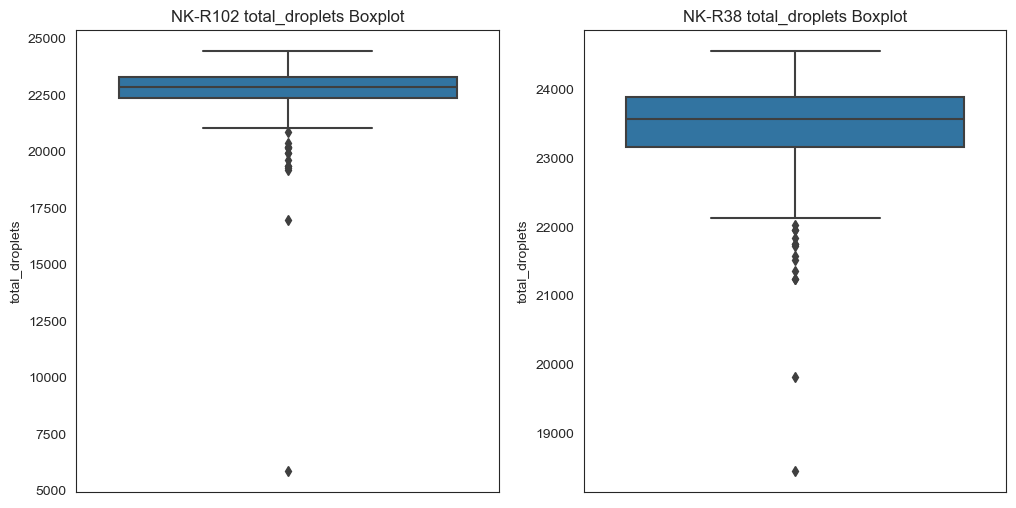

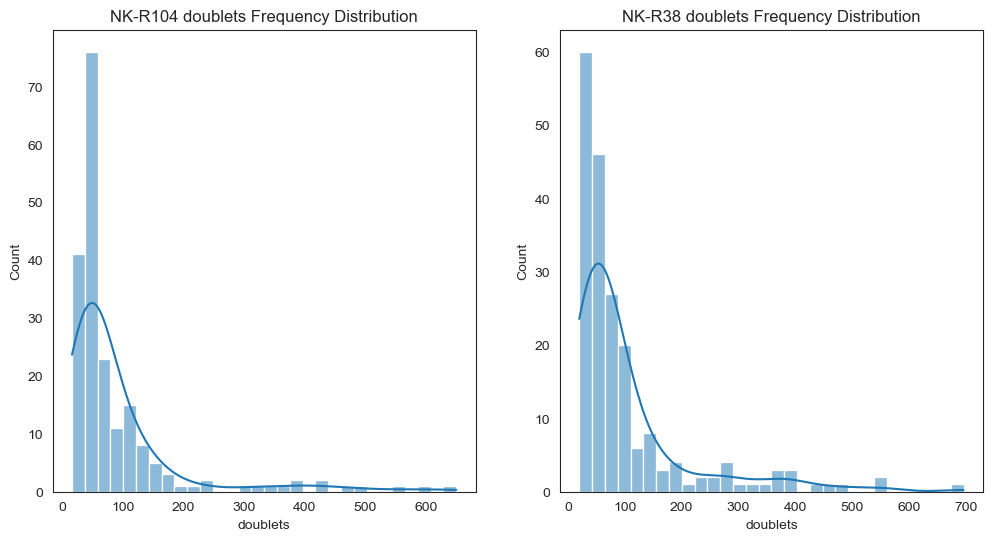

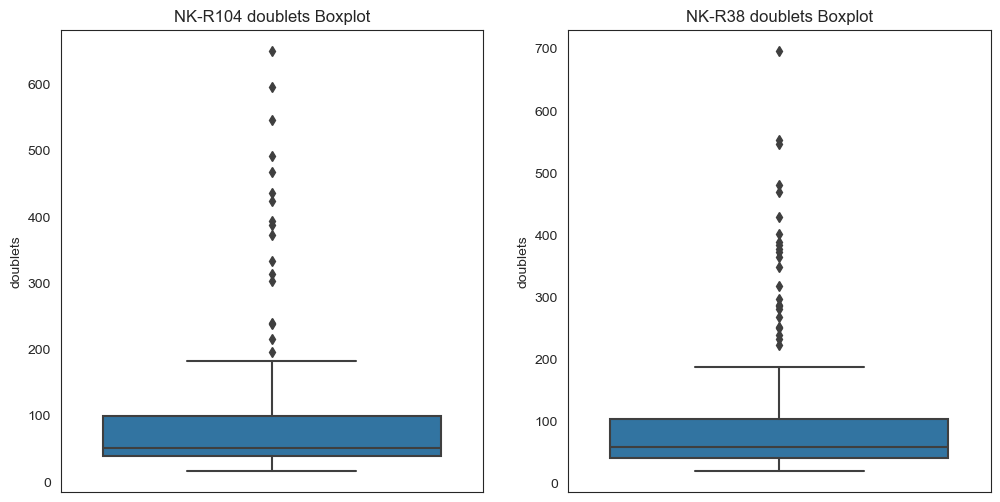

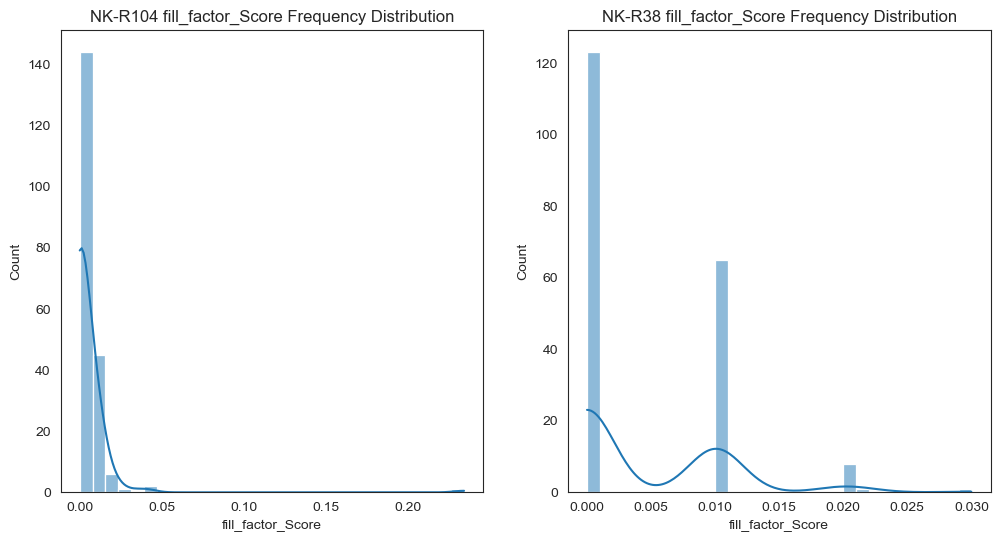

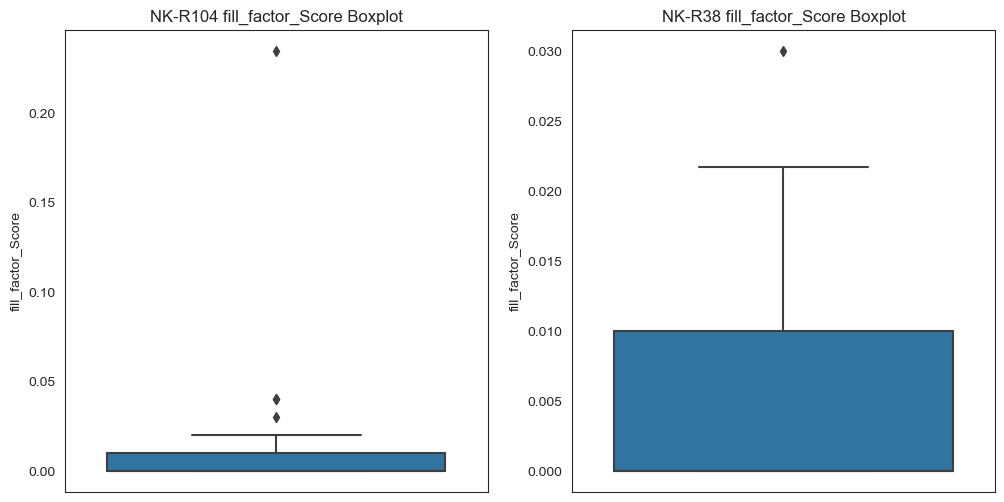

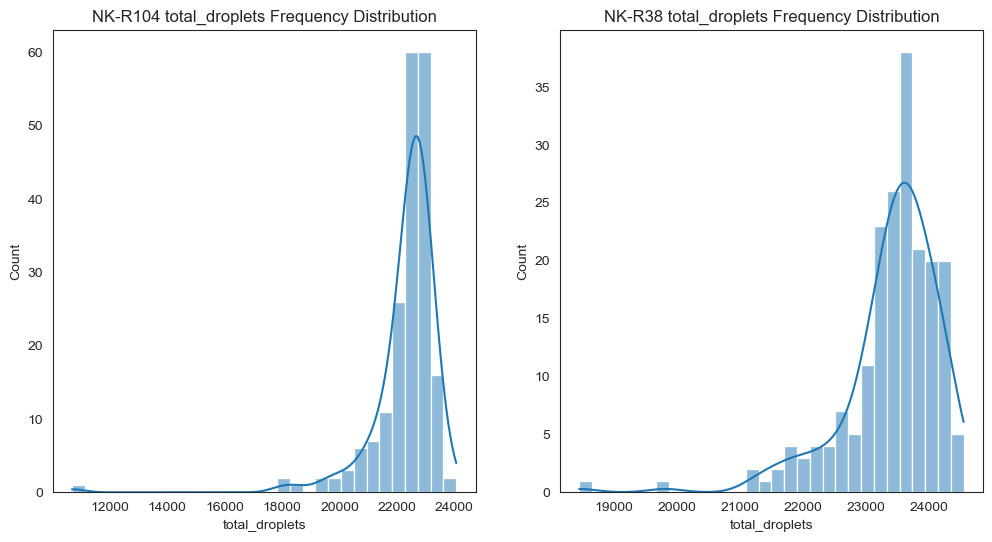

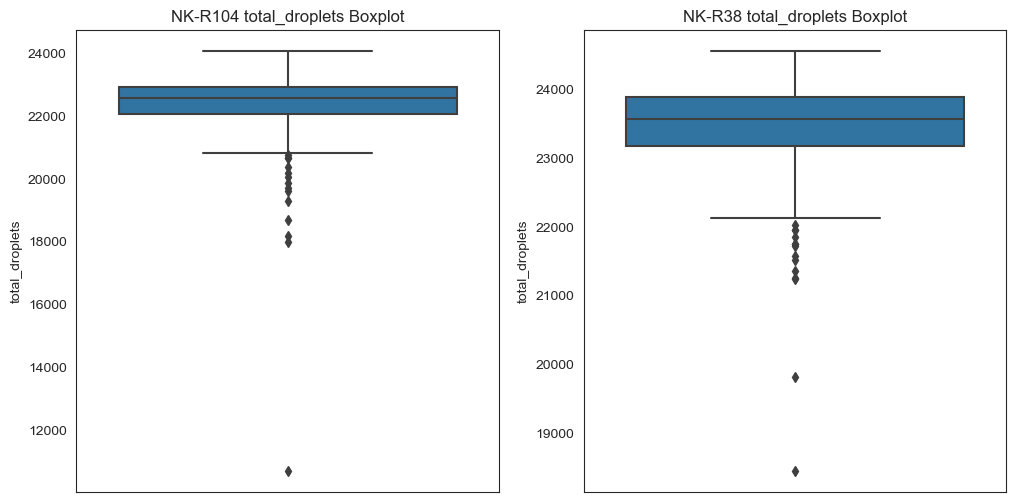

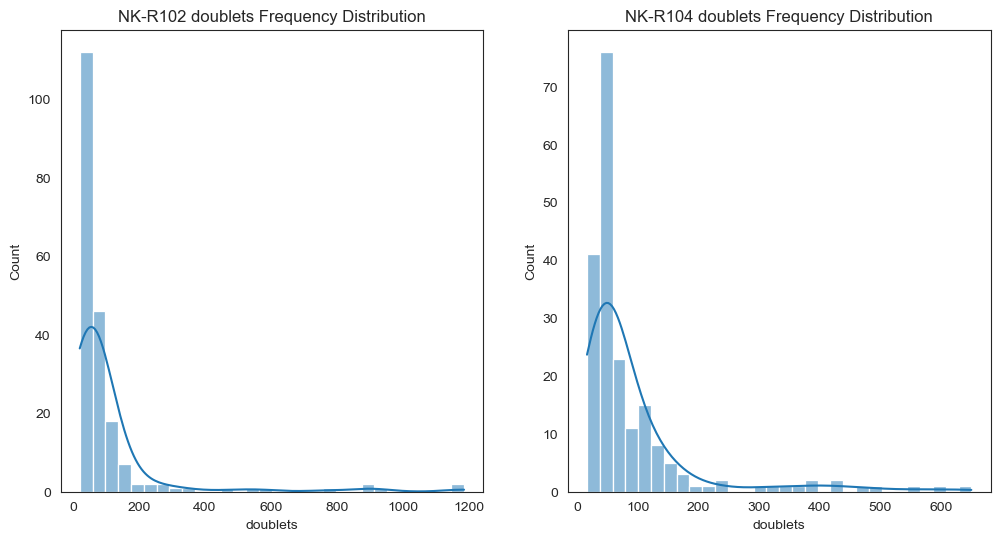

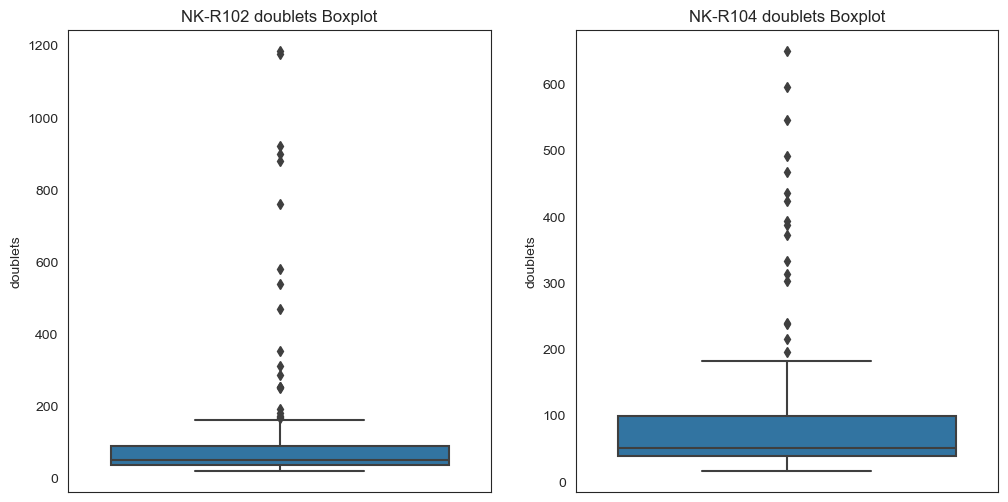

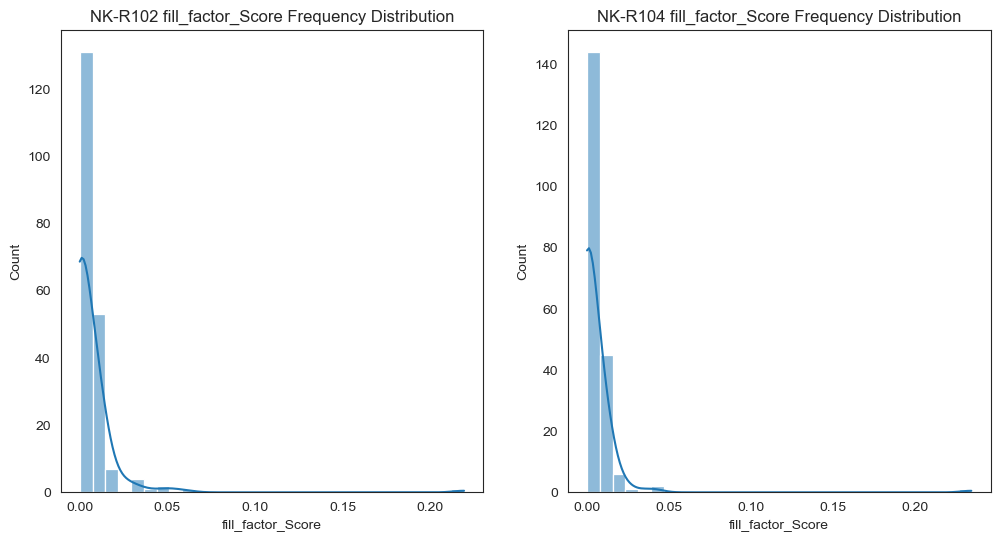

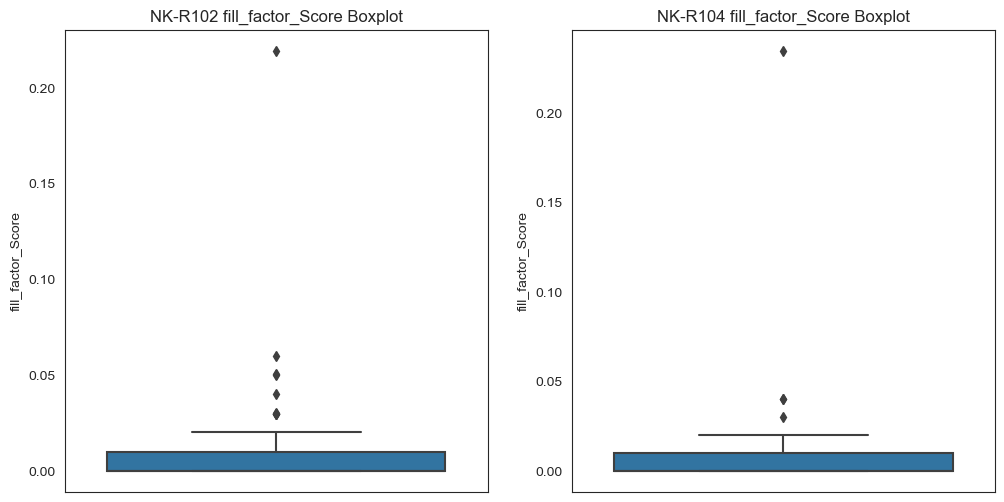

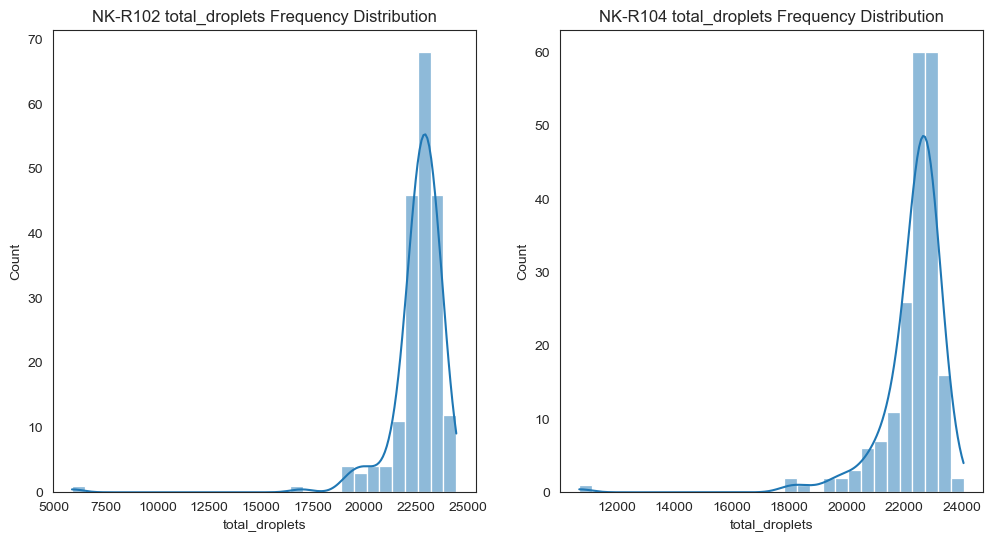

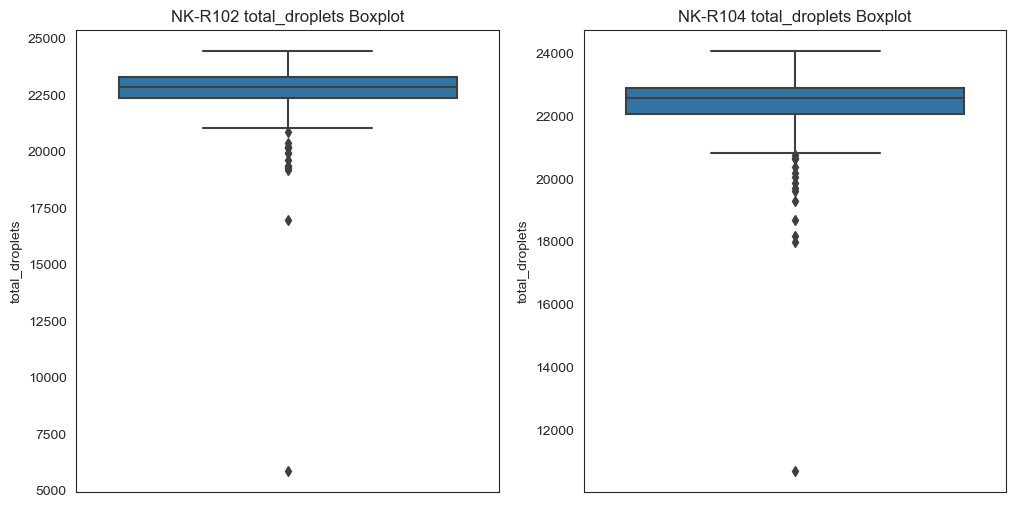

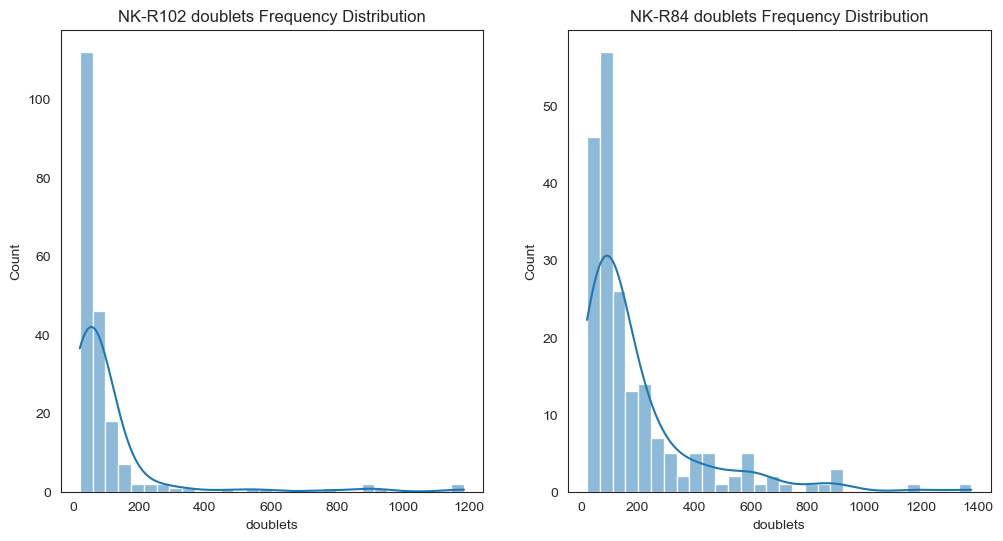

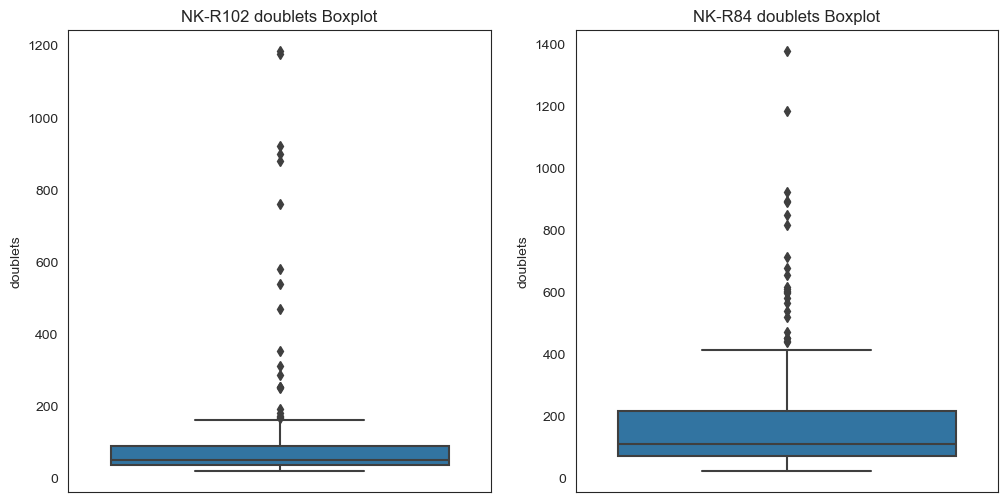

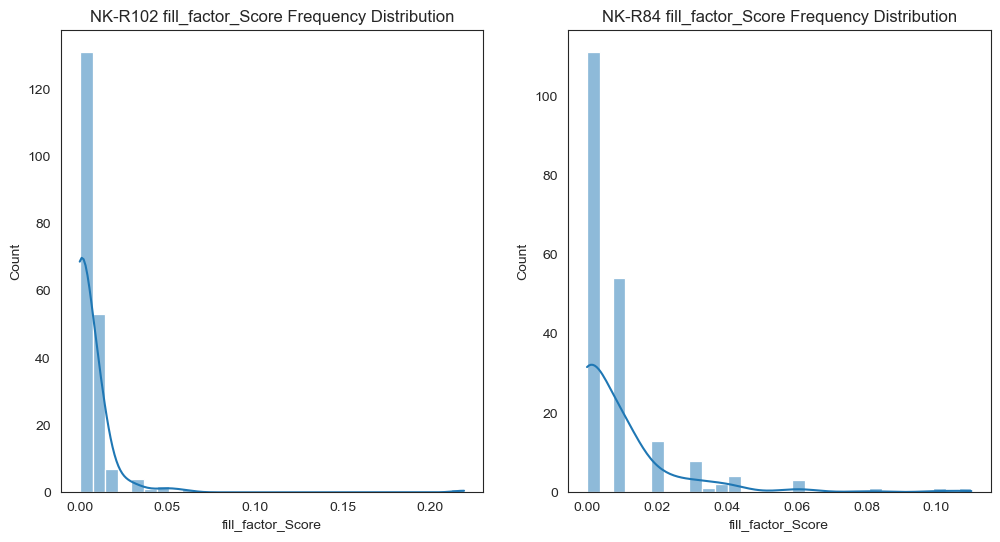

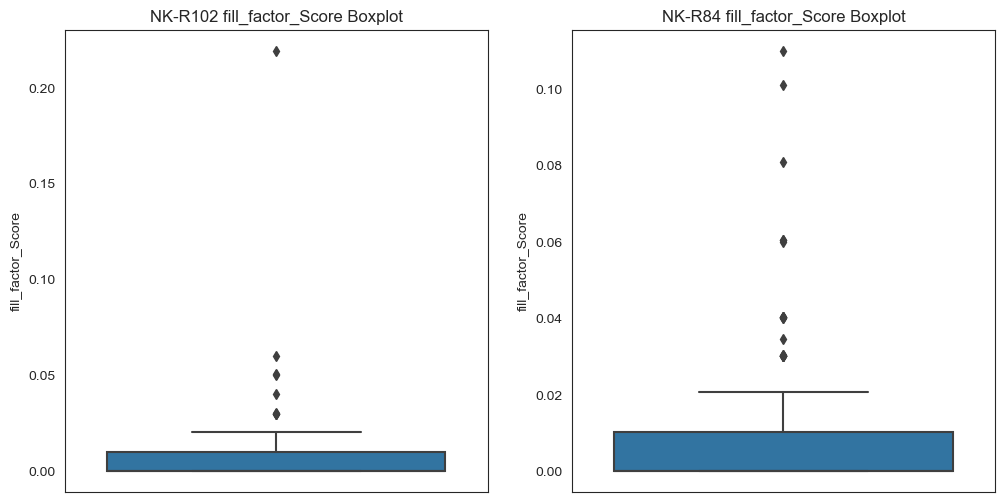

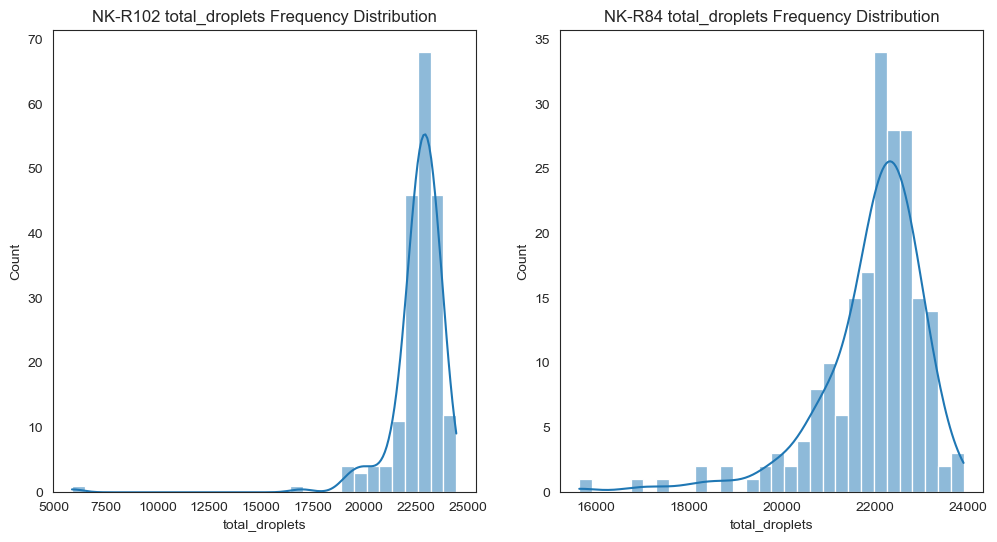

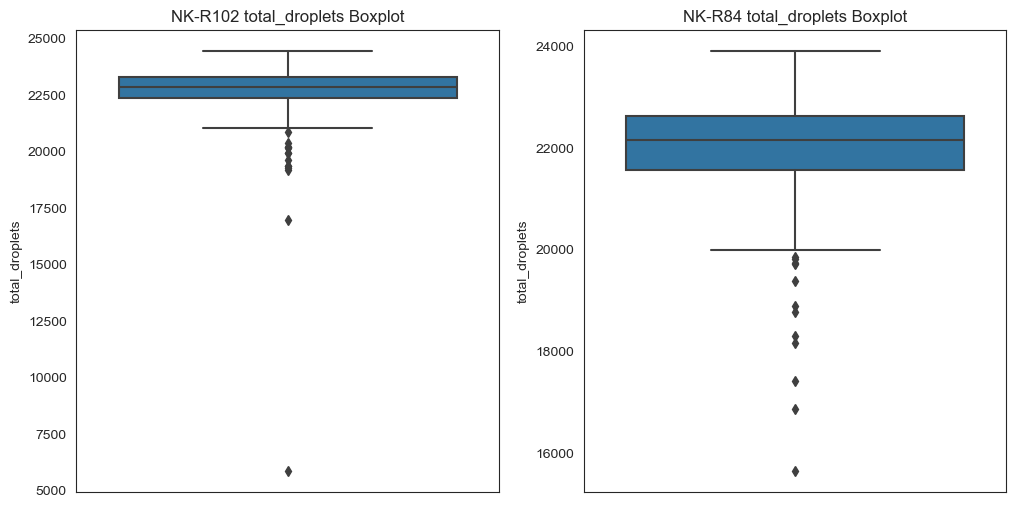

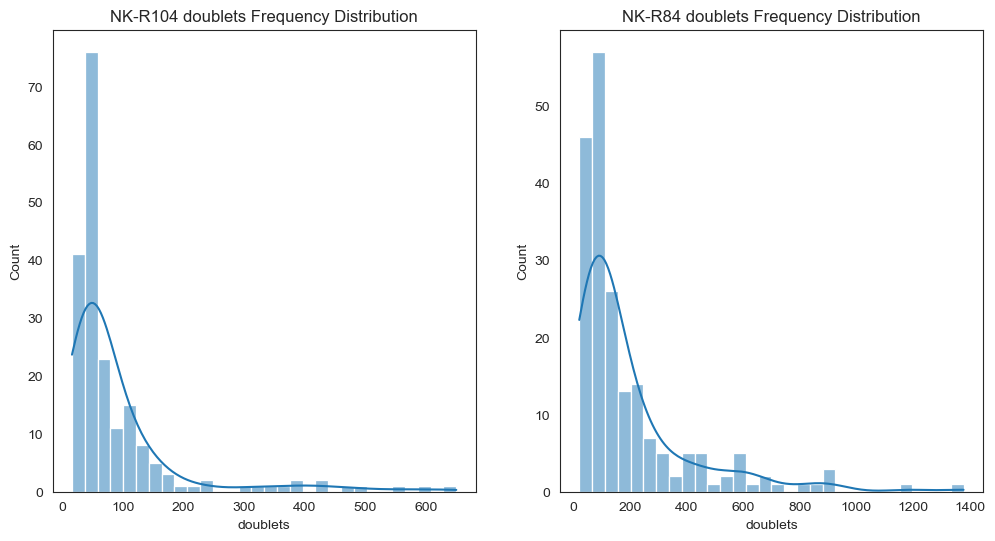

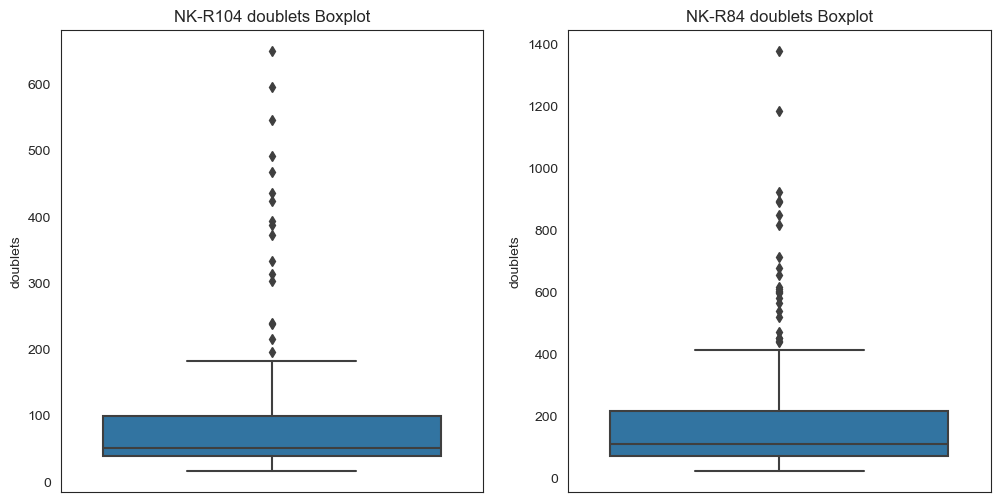

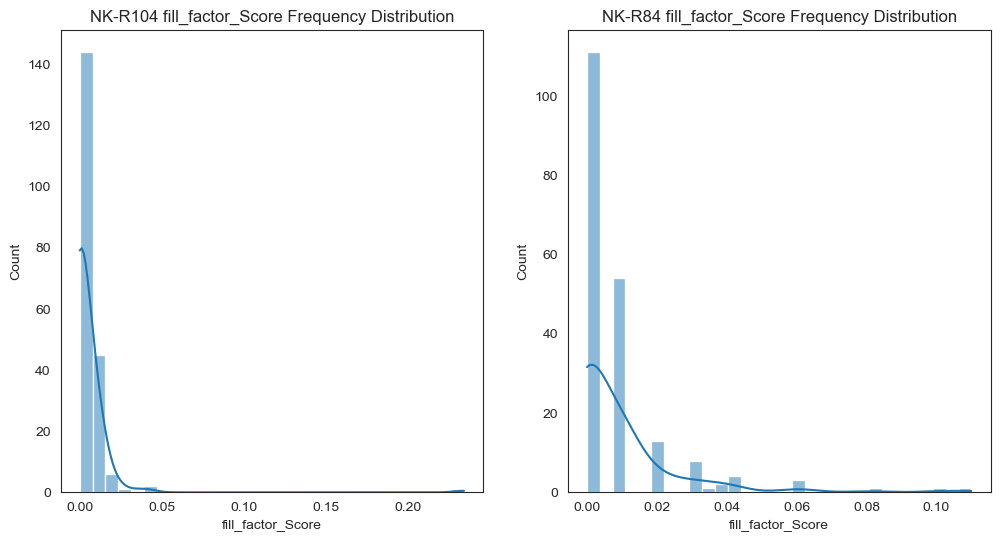

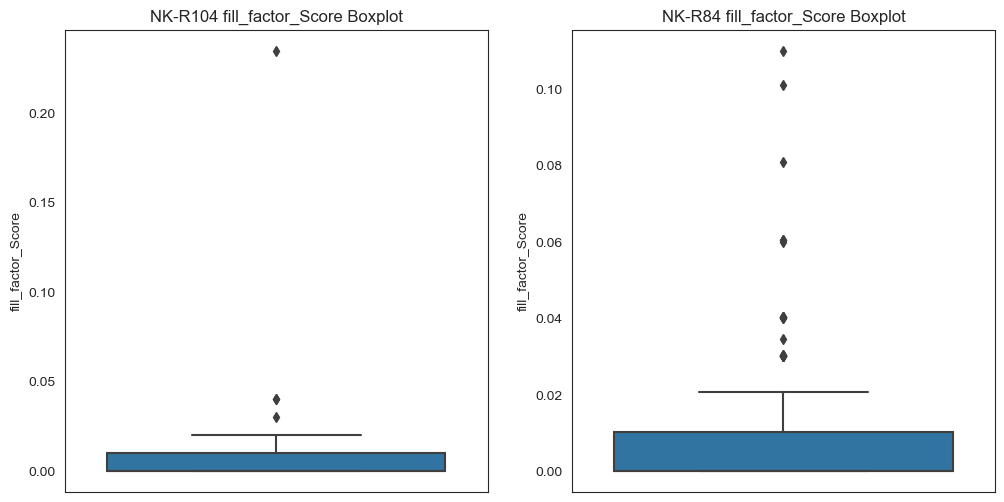

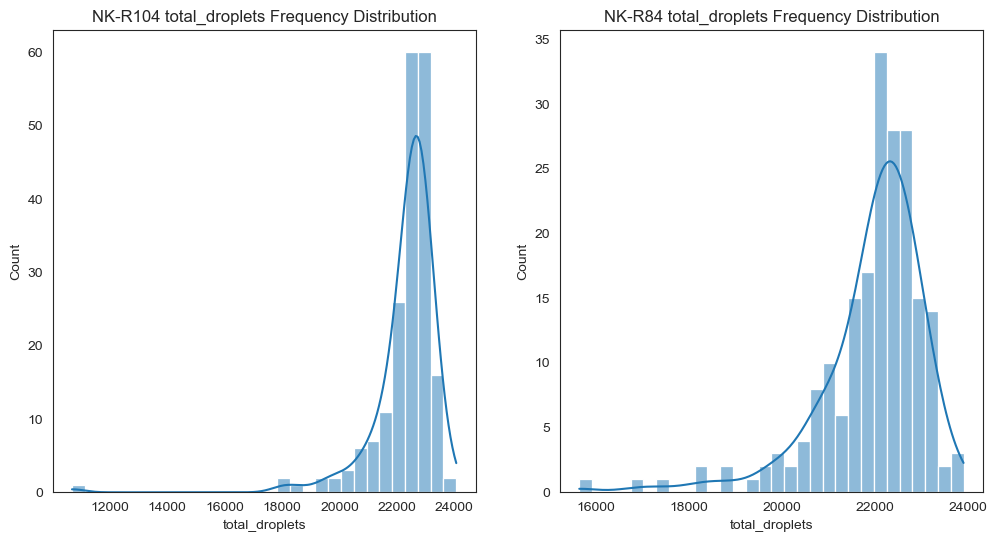

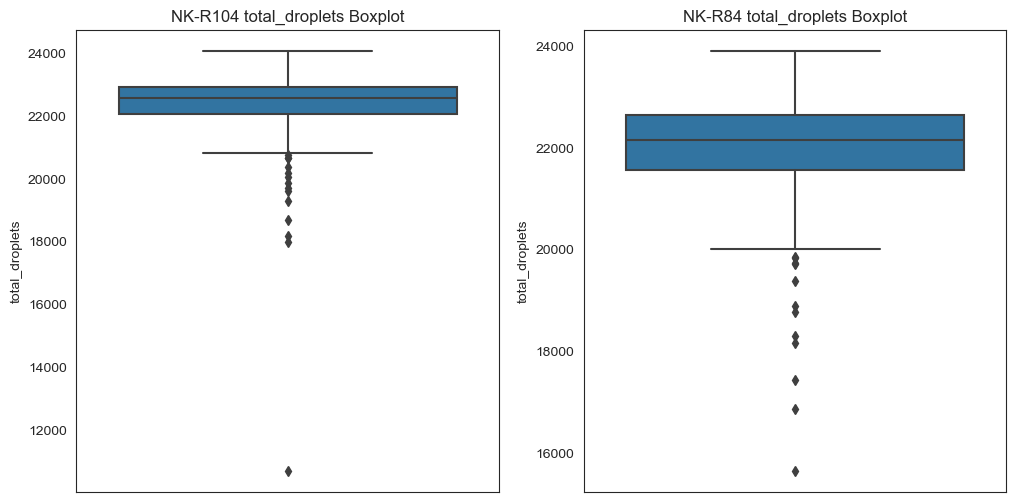

In [52]:
# Perform the analysis for each metric for NK-R102 vs 38 and NK-R104 vs 38
metrics = ['doublets', 'fill_factor_Score', 'total_droplets']
comparisons = [
    ('NK-R102', 'NK-R38'),
    ('NK-R104', 'NK-R38'),
    ('NK-R102', 'NK-R104'),
    ('NK-R102', 'NK-R84'),
    ('NK-R104', 'NK-R84')
]

results = {f"{reaction1}_vs_{reaction2}": {metric: analyze_metric(filtered_data, metric, reaction1, reaction2) for metric in metrics} for reaction1, reaction2 in comparisons}

In [57]:
# Compile results into a DataFrame with individual columns for summary statistics
def compile_results(results):
    compiled_data = []
    for comparison, metrics in results.items():
        for metric, result in metrics.items():
            row = {
                'Comparison': comparison,
                'Metric': metric,
                'Log Skewness Group1': result['group1_log_skewness'],
                'Log Skewness Group2': result['group2_log_skewness'],
                'T-test p-value (log)': result['p_value_log'],
                'Mann-Whitney U test p-value': result['p_value'],
                'Effect size (Cohen\'s d)': result['effect_size']
            }
            row.update({f'Group1 {stat}': value for stat, value in result['group1_summary'].items()})
            row.update({f'Group2 {stat}': value for stat, value in result['group2_summary'].items()})
            compiled_data.append(row)
    return pd.DataFrame(compiled_data)

# Compile the results into a DataFrame
compiled_results = compile_results(results)

# Display the DataFrame
compiled_results

,Comparison,Metric,Log Skewness Group1,Log Skewness Group2,T-test p-value (log),Mann-Whitney U test p-value,Effect size (Cohen's d),Group1 count,Group1 mean,Group1 std,...,Group1 75%,Group1 max,Group2 count,Group2 mean,Group2 std,Group2 min,Group2 25%,Group2 50%,Group2 75%,Group2 max
0,NK-R102_vs_NK-R38,doublets,1.656709,0.957895,2.046577e-01,1.296033e-01,0.008426,200.0,103.470000,173.064397,...,89.00,1185.000000,198.0,102.242424,111.395904,20.0,41.0,58.0,103.000000,696.000000
1,NK-R102_vs_NK-R38,fill_factor_Score,8.607057,1.206458,2.117695e-01,5.155359e-01,0.126686,200.0,0.006065,0.017753,...,0.01,0.219178,198.0,0.004379,0.006128,0.0,0.0,0.0,0.010000,0.030000
2,NK-R102_vs_NK-R38,total_droplets,-10.276621,-2.568360,1.366573e-06,4.592154e-20,-0.657474,200.0,22582.865000,1573.070884,...,23286.25,24449.000000,198.0,23404.883838,801.585473,18451.0,23168.0,23566.0,23891.500000,24554.000000
3,NK-R104_vs_NK-R38,doublets,1.185118,0.957895,1.174528e-01,1.236179e-01,-0.114427,199.0,89.874372,104.690739,...,99.00,650.000000,198.0,102.242424,111.395904,20.0,41.0,58.0,103.000000,696.000000
4,NK-R104_vs_NK-R38,fill_factor_Score,10.873364,1.206458,9.231860e-01,2.731910e-02,0.017909,199.0,0.004616,0.017668,...,0.01,0.234375,198.0,0.004379,0.006128,0.0,0.0,0.0,0.010000,0.030000
5,NK-R104_vs_NK-R38,total_droplets,-6.853585,-2.568360,5.071297e-18,7.679705e-36,-1.050915,199.0,22301.135678,1249.513193,...,22906.00,24065.000000,198.0,23404.883838,801.585473,18451.0,23168.0,23566.0,23891.500000,24554.000000
6,NK-R102_vs_NK-R104,doublets,1.656709,1.185118,7.978197e-01,9.228727e-01,0.095003,200.0,103.470000,173.064397,...,89.00,1185.000000,199.0,89.874372,104.690739,16.0,38.5,50.0,99.000000,650.000000
7,NK-R102_vs_NK-R104,fill_factor_Score,8.607057,10.873364,3.777031e-01,1.249123e-01,0.081797,200.0,0.006065,0.017753,...,0.01,0.219178,199.0,0.004616,0.017668,0.0,0.0,0.0,0.010000,0.234375
8,NK-R102_vs_NK-R104,total_droplets,-10.276621,-6.853585,2.473237e-01,9.929406e-06,0.198270,200.0,22582.865000,1573.070884,...,23286.25,24449.000000,199.0,22301.135678,1249.513193,10694.0,22065.0,22569.0,22906.000000,24065.000000
9,NK-R102_vs_NK-R84,doublets,1.656709,0.519352,5.551646e-15,3.205989e-17,-0.464342,200.0,103.470000,173.064397,...,89.00,1185.000000,199.0,194.417085,216.368447,22.0,70.5,108.0,215.500000,1378.000000


In [59]:
# Save the DataFrame to a CSV file
output_file = "../Output_Docs/compiled_results.csv"
compiled_results.to_csv(output_file, index=False)

print(f"Results saved to {output_file}.")

Results saved to ../Output_Docs/compiled_results.csv.


## Conclution:

Please check the presentation for details.